TSA PROJECT - FORECAST WITH VECM AND ARIMA MODELS

Preparation of data and global settings

In [ ]:
# Loading dependencies
import pandas as pd # for data processing
import numpy as np # here mostly for series generation

import matplotlib.pyplot as plt # for vizualization
import matplotlib.dates as mdates # for data formatting when visualizing
import matplotlib.ticker as ticker # for more advanced axis formatting
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm # for linear regression model, OLS estimation
import statsmodels.stats.diagnostic as smd # for Breusch-Godfrey test
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR, VECM
from statsmodels.api import OLS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # ACF, PACF plots
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.vector_ar.vecm import select_order, select_coint_rank, coint_johansen
from scipy.stats import norm
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from IPython.display import Markdown

import yfinance as yf # for importing data directly from finance.yahoo.com

import warnings
warnings.simplefilter("ignore", category="UserWarning")
warnings.simplefilter("ignore", category="ValueWarning")

# Set global options
pd.options.display.float_format = '{:.10f}'.format
sns.set_theme(style="whitegrid")

# Set plotting style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings("ignore")

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

In [2]:
#Importing dataset
df = pd.read_csv("TSA_2025_project_data_1.csv") 

In [3]:
df.head()

,date,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
0,2023-09-09,109.4100000000,109.4100000000,109.4100000000,124.2400000000,124.4700000000,109.4100000000,119.9400000000,104.6600000000,107.6200000000,119.3200000000
1,2023-09-10,109.4100000000,109.4100000000,109.4100000000,124.2100000000,124.3200000000,109.4100000000,101.3900000000,104.3400000000,102.6100000000,119.3600000000
2,2023-09-11,109.4200000000,109.4100000000,109.4100000000,124.4100000000,124.3700000000,109.4100000000,97.6400000000,104.2300000000,99.1600000000,119.3800000000
3,2023-09-12,108.6800000000,110.1900000000,111.1200000000,123.9300000000,124.8200000000,109.4100000000,94.3500000000,107.2300000000,103.3900000000,121.0600000000
4,2023-09-13,106.2100000000,110.8800000000,112.9200000000,122.6800000000,123.9100000000,107.8400000000,96.2200000000,109.7100000000,102.4300000000,122.1700000000


In [4]:
df.tail()

,date,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
595,2025-04-26,236.2500000000,157.4300000000,98.5300000000,187.4200000000,104.9200000000,70.5900000000,38.8800000000,86.8000000000,136.4900000000,215.3200000000
596,2025-04-27,235.2600000000,159.6600000000,100.2400000000,187.0900000000,104.5100000000,69.5400000000,30.5500000000,89.8800000000,131.3800000000,220.0300000000
597,2025-04-28,235.0700000000,162.0400000000,102.2700000000,187.4000000000,104.0300000000,68.7200000000,38.7200000000,93.0900000000,129.8600000000,224.6000000000
598,2025-04-29,234.9900000000,164.3900000000,103.1700000000,186.8800000000,103.3400000000,67.4100000000,44.0100000000,94.2400000000,128.1600000000,229.3100000000
599,2025-04-30,234.7000000000,167.0500000000,105.4500000000,186.7600000000,102.9000000000,66.3600000000,53.7500000000,98.2600000000,132.4900000000,234.8700000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    600 non-null    object 
 1   y1      600 non-null    float64
 2   y2      600 non-null    float64
 3   y3      600 non-null    float64
 4   y4      600 non-null    float64
 5   y5      600 non-null    float64
 6   y6      600 non-null    float64
 7   y7      600 non-null    float64
 8   y8      600 non-null    float64
 9   y9      600 non-null    float64
 10  y10     600 non-null    float64
dtypes: float64(10), object(1)
memory usage: 51.7+ KB


In [6]:
# Convert the `date` column to datetime
df['date'] = pd.to_datetime(df['date'])
print(df.info())

# Set the `date` column as the index
df.set_index('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    600 non-null    datetime64[ns]
 1   y1      600 non-null    float64       
 2   y2      600 non-null    float64       
 3   y3      600 non-null    float64       
 4   y4      600 non-null    float64       
 5   y5      600 non-null    float64       
 6   y6      600 non-null    float64       
 7   y7      600 non-null    float64       
 8   y8      600 non-null    float64       
 9   y9      600 non-null    float64       
 10  y10     600 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 51.7 KB
None


In [7]:
# Creation of shorter sample by excluding last 25 observations (OOS)
forecast_horizon = 25
df_in_sample = df.iloc[:-forecast_horizon]

In [8]:
df_in_sample

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
date,,,,,,,,,,
2023-09-09,109.4100000000,109.4100000000,109.4100000000,124.2400000000,124.4700000000,109.4100000000,119.9400000000,104.6600000000,107.6200000000,119.3200000000
2023-09-10,109.4100000000,109.4100000000,109.4100000000,124.2100000000,124.3200000000,109.4100000000,101.3900000000,104.3400000000,102.6100000000,119.3600000000
2023-09-11,109.4200000000,109.4100000000,109.4100000000,124.4100000000,124.3700000000,109.4100000000,97.6400000000,104.2300000000,99.1600000000,119.3800000000
2023-09-12,108.6800000000,110.1900000000,111.1200000000,123.9300000000,124.8200000000,109.4100000000,94.3500000000,107.2300000000,103.3900000000,121.0600000000
2023-09-13,106.2100000000,110.8800000000,112.9200000000,122.6800000000,123.9100000000,107.8400000000,96.2200000000,109.7100000000,102.4300000000,122.1700000000
...,...,...,...,...,...,...,...,...,...,...
2025-04-01,224.1200000000,166.0000000000,82.2000000000,181.8800000000,112.3600000000,85.4100000000,67.0800000000,60.9000000000,161.1700000000,232.5900000000
2025-04-02,222.0700000000,165.7500000000,82.1600000000,180.9900000000,112.8400000000,86.4800000000,63.8100000000,61.0000000000,164.5500000000,232.0900000000
2025-04-03,219.1900000000,164.1600000000,81.6600000000,179.8500000000,113.1300000000,87.4500000000,61.4400000000,60.1900000000,166.9800000000,228.8800000000


Finding a cointegrated variables

In [9]:
# Create first differences of each variable (napisać loopa)
df['dy1'] = df['y1'].diff()
df['dy2'] = df['y2'].diff()
df['dy3'] = df['y3'].diff()
df['dy4'] = df['y4'].diff()
df['dy5'] = df['y5'].diff()
df['dy6'] = df['y6'].diff()
df['dy7'] = df['y7'].diff()
df['dy8'] = df['y8'].diff()
df['dy9'] = df['y9'].diff()
df['dy10'] = df['y10'].diff()

In [10]:
#ADF test creation for cointegration analysis
def adf_test(series, max_aug=10, version='c'):
    
    results = []

    y = series.diff()
    X = pd.DataFrame({'y_lag': series.shift()})

    if version == 'c' or version == 't': # constant to be added optionally 
        X = sm.add_constant(X)
    if version == 't': # (deterministic) trend component to be added optionally
        X['trend'] = range(len(X))

    for i in range(0, max_aug): # iterating through different numbers of augmentations
        
        for aug in range(1, i+1): # adding augmentations max_aug is reached
            X['aug_'+str(aug)] = y.shift(aug)

        model = sm.OLS(series.diff(), X, missing='drop').fit() # fitting a linear regression with OLS

        ts = model.tvalues['y_lag'] # test statistic
        nobs = model.nobs # number of observations

        if version == 'n': # critical values for basic version of ADF
            if nobs > 100:
                cv01 = -2.567; cv05 = -1.941; cv10 = -1.616 # critical values for more than 500 observations
            else:
                cv01 = np.nan; cv05 = np.nan; cv10 = np.nan # if number of observations is lower than 500, we should check the critical values manually
        if version == 'c': # critical values for version with constant
            if nobs > 100:
                cv01 = -3.434; cv05 = -2.863; cv10 = -2.568 # critical values for more than 500 observations
            else:
                cv01 = np.nan; cv05 = np.nan; cv10 = np.nan # if number of observations is lower than 500, we should check the critical values manually
        if version == 't': # critical values for version with constant and (deterministic) trend component
            if nobs > 100:
                cv01 = -3.963; cv05 = -3.413; cv10 = -3.128 # critical values for more than 500 observations
            else:
                cv01 = np.nan; cv05 = np.nan; cv10 = np.nan # if number of observations is lower than 500, we should check the critical values manually

        bg_test01 = smd.acorr_breusch_godfrey(model, nlags=1);  bg_pvalue01 = round(bg_test01[1],4); bg_test01 = round(bg_test01[0],4); 
        bg_test05 = smd.acorr_breusch_godfrey(model, nlags=5);  bg_pvalue05 = round(bg_test05[1],4); bg_test05 = round(bg_test05[0],4); 
        bg_test10 = smd.acorr_breusch_godfrey(model, nlags=10); bg_pvalue10 = round(bg_test10[1],4); bg_test10 = round(bg_test10[0],4);
        bg_test15 = smd.acorr_breusch_godfrey(model, nlags=15); bg_pvalue15 = round(bg_test15[1],4); bg_test15 = round(bg_test15[0],4);

        results.append([i, ts, cv01, cv05, cv10, 
                        bg_test01, bg_pvalue01, bg_test05, bg_pvalue05, bg_test10, bg_pvalue10, bg_test15, bg_pvalue15])

    results_df = pd.DataFrame(results)
    results_df.columns = ['number of augmentations', 
                          'ADF test statistic', 'ADF critival value (1%)', 'ADF critival value (5%)', 'ADF critival value (10%)', 
                          'BG test (1 lag) (statistic)', 'BG test (1 lag) (p-value)', 
                          'BG test (5 lags) (statistic)', 'BG test (5 lags) (p-value)', 
                          'BG test (10 lags) (statistic)', 'BG test (10 lags) (p-value)', 
                          'BG test (15 lags) (statistic)', 'BG test (15 lags) (p-value)']
    
    return results_df


In [11]:
#We will assume alpha=5% level

In [12]:
# ADF test for `y1`
adf_test(df['y1']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-0.9894271739,-3.4340000000,-2.8630000000,-2.5680000000,427.0368000000,0.0000000000,445.4016000000,0.0000000000,448.6724000000,0.0000000000,449.9097000000,0.0000000000
1,1,-1.3344565127,-3.4340000000,-2.8630000000,-2.5680000000,36.0971000000,0.0000000000,68.0143000000,0.0000000000,75.4706000000,0.0000000000,81.0656000000,0.0000000000
2,2,-1.1363891474,-3.4340000000,-2.8630000000,-2.5680000000,14.4968000000,0.0001000000,36.3640000000,0.0000000000,43.5301000000,0.0000000000,50.9623000000,0.0000000000
3,3,-1.0849727958,-3.4340000000,-2.8630000000,-2.5680000000,11.1237000000,0.0009000000,24.2122000000,0.0002000000,33.4468000000,0.0002000000,37.7034000000,0.0010000000
4,4,-1.2609504141,-3.4340000000,-2.8630000000,-2.5680000000,0.6666000000,0.4142000000,8.5196000000,0.1298000000,14.5951000000,0.1475000000,25.1128000000,0.0484000000
5,5,-1.2397924807,-3.4340000000,-2.8630000000,-2.5680000000,5.5406000000,0.0186000000,13.3880000000,0.0200000000,19.9717000000,0.0295000000,26.3727000000,0.0343000000
6,6,-1.2521086342,-3.4340000000,-2.8630000000,-2.5680000000,1.2994000000,0.2543000000,10.3887000000,0.0649000000,12.7118000000,0.2402000000,19.7614000000,0.1813000000
7,7,-1.2824815097,-3.4340000000,-2.8630000000,-2.5680000000,1.7755000000,0.1827000000,7.2793000000,0.2007000000,13.4524000000,0.1995000000,20.6669000000,0.1478000000
8,8,-1.2300481012,-3.4340000000,-2.8630000000,-2.5680000000,4.6906000000,0.0303000000,7.2018000000,0.2061000000,17.7474000000,0.0594000000,21.1555000000,0.1319000000
9,9,-1.3506199589,-3.4340000000,-2.8630000000,-2.5680000000,0.6211000000,0.4306000000,6.8002000000,0.2359000000,15.3886000000,0.1185000000,23.3480000000,0.0770000000


In [13]:
# ADF test for `dy1`
adf_test(df['dy1']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-7.0952196043,-3.4340000000,-2.8630000000,-2.5680000000,36.5635000000,0.0000000000,68.6503000000,0.0000000000,76.1163000000,0.0000000000,81.0245000000,0.0000000000
1,1,-8.7560903745,-3.4340000000,-2.8630000000,-2.5680000000,14.6298000000,0.0001000000,35.6994000000,0.0000000000,43.5045000000,0.0000000000,49.5863000000,0.0000000000
2,2,-9.6403601295,-3.4340000000,-2.8630000000,-2.5680000000,11.2647000000,0.0008000000,23.9915000000,0.0002000000,32.7576000000,0.0003000000,37.1491000000,0.0012000000
3,3,-7.6964312413,-3.4340000000,-2.8630000000,-2.5680000000,0.7728000000,0.3794000000,8.4239000000,0.1344000000,14.2926000000,0.1601000000,24.2952000000,0.0602000000
4,4,-7.6396995319,-3.4340000000,-2.8630000000,-2.5680000000,5.3474000000,0.0208000000,13.1004000000,0.0225000000,19.4441000000,0.0350000000,25.3505000000,0.0454000000
5,5,-8.0090415912,-3.4340000000,-2.8630000000,-2.5680000000,1.3710000000,0.2416000000,10.1639000000,0.0707000000,12.1543000000,0.2749000000,18.6462000000,0.2302000000
6,6,-7.1861791541,-3.4340000000,-2.8630000000,-2.5680000000,1.8110000000,0.1784000000,6.9552000000,0.2240000000,12.6985000000,0.2410000000,19.1841000000,0.2055000000
7,7,-7.2388044322,-3.4340000000,-2.8630000000,-2.5680000000,4.6600000000,0.0309000000,6.9223000000,0.2265000000,17.5646000000,0.0628000000,19.8248000000,0.1788000000
8,8,-6.5200984266,-3.4340000000,-2.8630000000,-2.5680000000,0.7590000000,0.3836000000,6.2058000000,0.2867000000,14.4473000000,0.1535000000,21.3212000000,0.1269000000
9,9,-6.5926519592,-3.4340000000,-2.8630000000,-2.5680000000,0.3693000000,0.5434000000,8.2588000000,0.1425000000,11.4950000000,0.3203000000,16.5921000000,0.3438000000


In [14]:
#Result: y1~I(1)

In [15]:
# ADF test for `y2`
adf_test(df['y2']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-1.9196111103,-3.4340000000,-2.8630000000,-2.5680000000,440.9853000000,0.0000000000,466.5653000000,0.0000000000,469.5876000000,0.0000000000,470.3054000000,0.0000000000
1,1,-2.7160439858,-3.4340000000,-2.8630000000,-2.5680000000,48.5094000000,0.0000000000,102.4419000000,0.0000000000,107.3051000000,0.0000000000,109.5806000000,0.0000000000
2,2,-2.2348036823,-3.4340000000,-2.8630000000,-2.5680000000,30.4370000000,0.0000000000,60.8547000000,0.0000000000,64.0339000000,0.0000000000,66.2156000000,0.0000000000
3,3,-2.5345696215,-3.4340000000,-2.8630000000,-2.5680000000,12.7366000000,0.0004000000,32.7305000000,0.0000000000,38.6981000000,0.0000000000,40.2859000000,0.0004000000
4,4,-2.3095732148,-3.4340000000,-2.8630000000,-2.5680000000,11.8317000000,0.0006000000,25.3848000000,0.0001000000,29.6713000000,0.0010000000,31.5841000000,0.0073000000
5,5,-2.3847805907,-3.4340000000,-2.8630000000,-2.5680000000,6.2381000000,0.0125000000,13.5780000000,0.0185000000,17.1554000000,0.0710000000,18.6333000000,0.2308000000
6,6,-2.2020254583,-3.4340000000,-2.8630000000,-2.5680000000,2.2320000000,0.1352000000,2.9796000000,0.7031000000,7.7821000000,0.6501000000,10.1239000000,0.8119000000
7,7,-2.2329821803,-3.4340000000,-2.8630000000,-2.5680000000,0.0407000000,0.8401000000,4.8699000000,0.4320000000,6.7432000000,0.7494000000,9.0135000000,0.8768000000
8,8,-2.1303061193,-3.4340000000,-2.8630000000,-2.5680000000,0.0026000000,0.9597000000,0.8417000000,0.9743000000,9.1676000000,0.5163000000,11.4255000000,0.7219000000
9,9,-2.1968964608,-3.4340000000,-2.8630000000,-2.5680000000,0.5787000000,0.4468000000,4.0392000000,0.5438000000,6.7117000000,0.7524000000,9.9634000000,0.8220000000


In [16]:
# ADF test for `dy2`
adf_test(df['dy2']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-6.7164840439,-3.4340000000,-2.8630000000,-2.5680000000,50.7335000000,0.0000000000,104.0554000000,0.0000000000,108.3224000000,0.0000000000,110.4785000000,0.0000000000
1,1,-8.7472908120,-3.4340000000,-2.8630000000,-2.5680000000,28.7138000000,0.0000000000,59.8497000000,0.0000000000,63.6379000000,0.0000000000,65.5374000000,0.0000000000
2,2,-6.5493914049,-3.4340000000,-2.8630000000,-2.5680000000,13.7303000000,0.0002000000,34.0302000000,0.0000000000,39.3002000000,0.0000000000,40.6251000000,0.0004000000
3,3,-7.3642206681,-3.4340000000,-2.8630000000,-2.5680000000,10.3839000000,0.0013000000,22.4653000000,0.0004000000,28.3368000000,0.0016000000,31.1138000000,0.0085000000
4,4,-6.2031619864,-3.4340000000,-2.8630000000,-2.5680000000,6.1178000000,0.0134000000,14.5007000000,0.0127000000,17.3519000000,0.0669000000,18.6219000000,0.2314000000
5,5,-6.7516221923,-3.4340000000,-2.8630000000,-2.5680000000,1.7230000000,0.1893000000,2.7227000000,0.7426000000,7.2082000000,0.7057000000,9.3991000000,0.8557000000
6,6,-6.1664641176,-3.4340000000,-2.8630000000,-2.5680000000,0.0909000000,0.7631000000,5.0103000000,0.4146000000,6.5366000000,0.7683000000,8.3776000000,0.9078000000
7,7,-6.1183307652,-3.4340000000,-2.8630000000,-2.5680000000,0.0092000000,0.9235000000,0.6202000000,0.9871000000,8.3127000000,0.5983000000,10.3610000000,0.7964000000
8,8,-5.5934439865,-3.4340000000,-2.8630000000,-2.5680000000,0.2713000000,0.6025000000,3.8111000000,0.5769000000,5.9324000000,0.8209000000,8.4515000000,0.9044000000
9,9,-5.1882704032,-3.4340000000,-2.8630000000,-2.5680000000,0.9615000000,0.3268000000,2.5291000000,0.7721000000,4.7003000000,0.9103000000,7.4222000000,0.9449000000


In [17]:
#Result: y2~I(1)

In [18]:
# ADF test for `y3`
adf_test(df['y3']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-0.3900568374,-3.4340000000,-2.8630000000,-2.5680000000,239.9757000000,0.0000000000,261.3607000000,0.0000000000,264.8588000000,0.0000000000,266.9053000000,0.0000000000
1,1,-0.9359726535,-3.4340000000,-2.8630000000,-2.5680000000,28.2813000000,0.0000000000,39.2301000000,0.0000000000,41.4896000000,0.0000000000,45.2151000000,0.0001000000
2,2,-1.1770843932,-3.4340000000,-2.8630000000,-2.5680000000,5.4923000000,0.0191000000,11.3506000000,0.0449000000,16.0466000000,0.0983000000,18.8753000000,0.2194000000
3,3,-1.2761613354,-3.4340000000,-2.8630000000,-2.5680000000,3.1891000000,0.0741000000,5.5129000000,0.3565000000,10.3598000000,0.4095000000,13.6143000000,0.5550000000
4,4,-1.3466653608,-3.4340000000,-2.8630000000,-2.5680000000,0.5217000000,0.4701000000,7.1471000000,0.2099000000,10.1068000000,0.4312000000,13.8369000000,0.5379000000
5,5,-1.3464430051,-3.4340000000,-2.8630000000,-2.5680000000,1.3220000000,0.2502000000,4.1566000000,0.5271000000,8.1831000000,0.6110000000,11.6589000000,0.7046000000
6,6,-1.2396191739,-3.4340000000,-2.8630000000,-2.5680000000,1.2436000000,0.2648000000,2.1808000000,0.8236000000,3.3150000000,0.9730000000,13.6879000000,0.5493000000
7,7,-1.3124228510,-3.4340000000,-2.8630000000,-2.5680000000,0.1401000000,0.7082000000,0.7238000000,0.9816000000,1.6131000000,0.9985000000,9.8796000000,0.8272000000
8,8,-1.3257240460,-3.4340000000,-2.8630000000,-2.5680000000,0.0670000000,0.7957000000,1.7336000000,0.8846000000,9.3770000000,0.4967000000,17.0450000000,0.3162000000
9,9,-1.3647851921,-3.4340000000,-2.8630000000,-2.5680000000,0.0002000000,0.9893000000,4.8893000000,0.4295000000,10.5909000000,0.3903000000,15.8514000000,0.3920000000


In [19]:
# ADF test for `dy3`
adf_test(df['dy3']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-11.5031472267,-3.4340000000,-2.8630000000,-2.5680000000,27.7899000000,0.0000000000,38.5411000000,0.0000000000,40.5903000000,0.0000000000,43.7080000000,0.0001000000
1,1,-8.3124467688,-3.4340000000,-2.8630000000,-2.5680000000,5.2132000000,0.0224000000,12.6526000000,0.0269000000,15.5424000000,0.1135000000,18.1248000000,0.2562000000
2,2,-7.1379052947,-3.4340000000,-2.8630000000,-2.5680000000,3.0007000000,0.0832000000,5.7131000000,0.3351000000,10.0621000000,0.4351000000,13.2671000000,0.5817000000
3,3,-6.4568791814,-3.4340000000,-2.8630000000,-2.5680000000,0.6491000000,0.4204000000,7.0893000000,0.2141000000,9.7514000000,0.4626000000,13.3040000000,0.5788000000
4,4,-6.2367293520,-3.4340000000,-2.8630000000,-2.5680000000,1.6402000000,0.2003000000,4.5728000000,0.4702000000,7.9098000000,0.6377000000,11.1551000000,0.7415000000
5,5,-6.5474247977,-3.4340000000,-2.8630000000,-2.5680000000,1.1454000000,0.2845000000,2.0720000000,0.8391000000,3.2236000000,0.9757000000,13.5121000000,0.5628000000
6,6,-5.9648837497,-3.4340000000,-2.8630000000,-2.5680000000,0.0890000000,0.7655000000,0.7746000000,0.9786000000,1.4398000000,0.9991000000,10.0349000000,0.8175000000
7,7,-5.6769988657,-3.4340000000,-2.8630000000,-2.5680000000,0.0291000000,0.8645000000,1.6083000000,0.9002000000,8.6434000000,0.5662000000,16.7117000000,0.3364000000
8,8,-5.3513630046,-3.4340000000,-2.8630000000,-2.5680000000,0.0051000000,0.9431000000,4.7526000000,0.4468000000,10.1816000000,0.4247000000,14.8219000000,0.4643000000
9,9,-5.2162847189,-3.4340000000,-2.8630000000,-2.5680000000,2.8228000000,0.0929000000,5.4135000000,0.3675000000,11.6126000000,0.3118000000,17.4176000000,0.2945000000


In [20]:
#Result: y3~I(1)

In [21]:
# ADF test for `y4`
adf_test(df['y4']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-0.9917110998,-3.4340000000,-2.8630000000,-2.5680000000,314.7763000000,0.0000000000,329.9562000000,0.0000000000,331.8626000000,0.0000000000,333.6676000000,0.0000000000
1,1,-1.1252283932,-3.4340000000,-2.8630000000,-2.5680000000,12.7123000000,0.0004000000,32.6143000000,0.0000000000,35.8069000000,0.0001000000,42.3198000000,0.0002000000
2,2,-1.2149958352,-3.4340000000,-2.8630000000,-2.5680000000,19.0138000000,0.0000000000,20.8905000000,0.0008000000,24.2877000000,0.0069000000,29.7152000000,0.0130000000
3,3,-1.1375633443,-3.4340000000,-2.8630000000,-2.5680000000,0.8379000000,0.3600000000,5.5077000000,0.3571000000,9.0334000000,0.5289000000,14.8103000000,0.4652000000
4,4,-1.1958975842,-3.4340000000,-2.8630000000,-2.5680000000,0.0360000000,0.8495000000,2.7426000000,0.7396000000,7.3338000000,0.6936000000,13.2419000000,0.5836000000
5,5,-1.2368967188,-3.4340000000,-2.8630000000,-2.5680000000,0.0888000000,0.7657000000,5.0354000000,0.4116000000,7.8335000000,0.6451000000,15.0253000000,0.4496000000
6,6,-1.2600705324,-3.4340000000,-2.8630000000,-2.5680000000,0.0121000000,0.9123000000,2.8297000000,0.7262000000,7.0360000000,0.7220000000,14.7281000000,0.4712000000
7,7,-1.2625108599,-3.4340000000,-2.8630000000,-2.5680000000,0.8876000000,0.3461000000,4.1807000000,0.5237000000,11.2062000000,0.3417000000,15.7234000000,0.4007000000
8,8,-1.2549934124,-3.4340000000,-2.8630000000,-2.5680000000,0.9132000000,0.3393000000,5.1235000000,0.4010000000,12.0646000000,0.2808000000,19.3446000000,0.1985000000
9,9,-1.3247601663,-3.4340000000,-2.8630000000,-2.5680000000,0.2389000000,0.6250000000,6.0379000000,0.3025000000,16.2860000000,0.0917000000,21.4265000000,0.1237000000


In [22]:
# ADF test for `dy4`
adf_test(df['dy4']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-9.7508225813,-3.4340000000,-2.8630000000,-2.5680000000,12.4770000000,0.0004000000,32.7375000000,0.0000000000,35.8583000000,0.0001000000,41.6142000000,0.0003000000
1,1,-7.8120429998,-3.4340000000,-2.8630000000,-2.5680000000,19.3415000000,0.0000000000,21.2195000000,0.0007000000,24.7288000000,0.0059000000,29.5538000000,0.0136000000
2,2,-8.8948922620,-3.4340000000,-2.8630000000,-2.5680000000,0.8305000000,0.3621000000,5.3203000000,0.3781000000,8.5497000000,0.5753000000,14.1867000000,0.5114000000
3,3,-8.5885702500,-3.4340000000,-2.8630000000,-2.5680000000,0.0140000000,0.9058000000,2.5057000000,0.7756000000,6.7915000000,0.7450000000,12.5662000000,0.6358000000
4,4,-7.8438803206,-3.4340000000,-2.8630000000,-2.5680000000,0.1682000000,0.6817000000,4.8411000000,0.4356000000,7.0091000000,0.7246000000,14.0410000000,0.5224000000
5,5,-7.7957453397,-3.4340000000,-2.8630000000,-2.5680000000,0.0204000000,0.8864000000,2.7108000000,0.7445000000,6.3882000000,0.7817000000,13.6050000000,0.5557000000
6,6,-7.3546082847,-3.4340000000,-2.8630000000,-2.5680000000,1.2138000000,0.2706000000,3.8624000000,0.5694000000,9.7999000000,0.4582000000,14.5867000000,0.4816000000
7,7,-7.3494240323,-3.4340000000,-2.8630000000,-2.5680000000,1.0619000000,0.3028000000,4.5110000000,0.4784000000,11.8832000000,0.2930000000,18.3399000000,0.2452000000
8,8,-6.6982990688,-3.4340000000,-2.8630000000,-2.5680000000,0.3161000000,0.5740000000,5.2537000000,0.3857000000,14.9608000000,0.1335000000,19.6247000000,0.1868000000
9,9,-6.6147556116,-3.4340000000,-2.8630000000,-2.5680000000,0.0400000000,0.8415000000,7.1334000000,0.2109000000,12.4126000000,0.2584000000,16.3555000000,0.3588000000


In [23]:
#Result: y4~I(1)

In [24]:
# ADF test for `y5`
adf_test(df['y5']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-1.5011757345,-3.4340000000,-2.8630000000,-2.5680000000,10.3235000000,0.0013000000,62.2044000000,0.0000000000,74.6200000000,0.0000000000,78.2644000000,0.0000000000
1,1,-1.6039040918,-3.4340000000,-2.8630000000,-2.5680000000,0.5619000000,0.4535000000,52.4639000000,0.0000000000,65.3857000000,0.0000000000,68.5428000000,0.0000000000
2,2,-1.5852154660,-3.4340000000,-2.8630000000,-2.5680000000,0.1387000000,0.7095000000,53.3706000000,0.0000000000,66.6543000000,0.0000000000,69.8602000000,0.0000000000
3,3,-1.6502828614,-3.4340000000,-2.8630000000,-2.5680000000,12.3695000000,0.0004000000,53.5915000000,0.0000000000,65.8939000000,0.0000000000,69.1683000000,0.0000000000
4,4,-1.8807774151,-3.4340000000,-2.8630000000,-2.5680000000,6.3374000000,0.0118000000,21.3776000000,0.0007000000,22.5646000000,0.0125000000,28.8137000000,0.0170000000
5,5,-1.7025668423,-3.4340000000,-2.8630000000,-2.5680000000,0.5693000000,0.4505000000,11.6801000000,0.0394000000,13.4104000000,0.2016000000,21.7605000000,0.1142000000
6,6,-1.6741849496,-3.4340000000,-2.8630000000,-2.5680000000,3.0471000000,0.0809000000,14.1694000000,0.0146000000,14.4780000000,0.1523000000,25.8726000000,0.0394000000
7,7,-1.5631729299,-3.4340000000,-2.8630000000,-2.5680000000,7.2312000000,0.0072000000,13.4311000000,0.0197000000,21.1653000000,0.0200000000,29.2175000000,0.0151000000
8,8,-1.4829989163,-3.4340000000,-2.8630000000,-2.5680000000,1.4417000000,0.2299000000,4.4865000000,0.4817000000,12.9493000000,0.2265000000,16.3288000000,0.3605000000
9,9,-1.3629892055,-3.4340000000,-2.8630000000,-2.5680000000,0.4589000000,0.4981000000,1.5762000000,0.9041000000,15.4796000000,0.1155000000,19.1092000000,0.2088000000


In [25]:
# ADF test for `dy5`
adf_test(df['dy5']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-21.4358602064,-3.4340000000,-2.8630000000,-2.5680000000,0.6568000000,0.4177000000,51.7290000000,0.0000000000,65.4094000000,0.0000000000,68.5607000000,0.0000000000
1,1,-16.6075508008,-3.4340000000,-2.8630000000,-2.5680000000,0.2121000000,0.6452000000,52.9659000000,0.0000000000,66.8443000000,0.0000000000,70.0598000000,0.0000000000
2,2,-13.3751281620,-3.4340000000,-2.8630000000,-2.5680000000,12.7170000000,0.0004000000,53.5946000000,0.0000000000,66.3377000000,0.0000000000,69.6429000000,0.0000000000
3,3,-8.8209640904,-3.4340000000,-2.8630000000,-2.5680000000,6.5754000000,0.0103000000,22.4581000000,0.0004000000,23.6856000000,0.0085000000,30.1260000000,0.0115000000
4,4,-9.2712036574,-3.4340000000,-2.8630000000,-2.5680000000,0.7036000000,0.4016000000,11.5249000000,0.0419000000,14.6101000000,0.1469000000,22.8869000000,0.0866000000
5,5,-8.9525527021,-3.4340000000,-2.8630000000,-2.5680000000,3.6582000000,0.0558000000,14.9948000000,0.0104000000,15.1498000000,0.1267000000,25.8001000000,0.0402000000
6,6,-9.1093698286,-3.4340000000,-2.8630000000,-2.5680000000,7.4197000000,0.0065000000,14.1551000000,0.0147000000,21.0551000000,0.0207000000,29.4585000000,0.0140000000
7,7,-9.5590905269,-3.4340000000,-2.8630000000,-2.5680000000,1.1742000000,0.2785000000,4.4837000000,0.4821000000,12.8599000000,0.2316000000,15.8411000000,0.3927000000
8,8,-8.5354826318,-3.4340000000,-2.8630000000,-2.5680000000,0.3664000000,0.5449000000,1.6649000000,0.8933000000,14.1671000000,0.1655000000,17.8173000000,0.2724000000
9,9,-8.2182081263,-3.4340000000,-2.8630000000,-2.5680000000,0.0018000000,0.9664000000,1.2193000000,0.9430000000,12.2080000000,0.2714000000,17.5422000000,0.2875000000


In [26]:
#Result: y5~I(1)

In [27]:
# ADF test for `y6`
adf_test(df['y6']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-1.4433482353,-3.4340000000,-2.8630000000,-2.5680000000,33.2240000000,0.0000000000,133.7854000000,0.0000000000,158.2243000000,0.0000000000,170.5894000000,0.0000000000
1,1,-1.6434139931,-3.4340000000,-2.8630000000,-2.5680000000,2.0879000000,0.1485000000,106.1140000000,0.0000000000,132.0606000000,0.0000000000,144.5686000000,0.0000000000
2,2,-1.5908808898,-3.4340000000,-2.8630000000,-2.5680000000,0.0421000000,0.8374000000,104.3242000000,0.0000000000,130.9563000000,0.0000000000,143.8387000000,0.0000000000
3,3,-1.6016115140,-3.4340000000,-2.8630000000,-2.5680000000,44.5715000000,0.0000000000,105.0517000000,0.0000000000,130.9689000000,0.0000000000,143.9249000000,0.0000000000
4,4,-1.9632937593,-3.4340000000,-2.8630000000,-2.5680000000,31.2685000000,0.0000000000,57.8008000000,0.0000000000,70.6377000000,0.0000000000,83.6569000000,0.0000000000
5,5,-1.6695787068,-3.4340000000,-2.8630000000,-2.5680000000,0.0911000000,0.7627000000,32.4851000000,0.0000000000,42.1565000000,0.0000000000,57.3675000000,0.0000000000
6,6,-1.6801405379,-3.4340000000,-2.8630000000,-2.5680000000,4.1406000000,0.0419000000,33.5467000000,0.0000000000,43.2840000000,0.0000000000,61.9793000000,0.0000000000
7,7,-1.5551285853,-3.4340000000,-2.8630000000,-2.5680000000,12.7268000000,0.0004000000,31.7727000000,0.0000000000,51.6738000000,0.0000000000,62.0082000000,0.0000000000
8,8,-1.4515845173,-3.4340000000,-2.8630000000,-2.5680000000,8.7473000000,0.0031000000,18.9247000000,0.0020000000,33.5999000000,0.0002000000,44.1280000000,0.0001000000
9,9,-1.3796684672,-3.4340000000,-2.8630000000,-2.5680000000,2.7710000000,0.0960000000,14.1599000000,0.0146000000,33.7437000000,0.0002000000,35.7798000000,0.0019000000


In [28]:
# ADF test for `dy6`
adf_test(df['dy6']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-19.2342009377,-3.4340000000,-2.8630000000,-2.5680000000,2.2810000000,0.1310000000,105.7249000000,0.0000000000,132.2588000000,0.0000000000,144.7161000000,0.0000000000
1,1,-16.0340288158,-3.4340000000,-2.8630000000,-2.5680000000,0.0268000000,0.8700000000,103.6477000000,0.0000000000,131.2804000000,0.0000000000,144.1455000000,0.0000000000
2,2,-13.2703306488,-3.4340000000,-2.8630000000,-2.5680000000,65.7962000000,0.0000000000,105.1514000000,0.0000000000,131.2116000000,0.0000000000,144.1209000000,0.0000000000
3,3,-7.9928399577,-3.4340000000,-2.8630000000,-2.5680000000,31.9997000000,0.0000000000,59.1199000000,0.0000000000,72.0185000000,0.0000000000,85.0638000000,0.0000000000
4,4,-9.6395966472,-3.4340000000,-2.8630000000,-2.5680000000,0.0538000000,0.8166000000,32.5744000000,0.0000000000,43.0854000000,0.0000000000,58.4715000000,0.0000000000
5,5,-8.8370879569,-3.4340000000,-2.8630000000,-2.5680000000,3.5508000000,0.0595000000,34.7315000000,0.0000000000,44.5120000000,0.0000000000,62.2583000000,0.0000000000
6,6,-8.9888970330,-3.4340000000,-2.8630000000,-2.5680000000,12.8524000000,0.0003000000,32.3429000000,0.0000000000,51.3856000000,0.0000000000,61.9115000000,0.0000000000
7,7,-9.9104272807,-3.4340000000,-2.8630000000,-2.5680000000,8.2420000000,0.0041000000,19.2933000000,0.0017000000,33.5279000000,0.0002000000,44.0195000000,0.0001000000
8,8,-8.1580427150,-3.4340000000,-2.8630000000,-2.5680000000,2.5645000000,0.1093000000,14.2113000000,0.0143000000,32.0290000000,0.0004000000,34.3203000000,0.0031000000
9,9,-8.4763485009,-3.4340000000,-2.8630000000,-2.5680000000,0.1765000000,0.6744000000,9.1860000000,0.1019000000,22.6007000000,0.0123000000,32.4326000000,0.0056000000


In [29]:
#Result: y6~I(1)

In [30]:
# ADF test for `y7`
adf_test(df['y7']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-1.0095948797,-3.4340000000,-2.8630000000,-2.5680000000,0.2177000000,0.6408000000,4.0733000000,0.5389000000,20.1379000000,0.0280000000,26.6225000000,0.0320000000
1,1,-1.0457533531,-3.4340000000,-2.8630000000,-2.5680000000,0.2137000000,0.6439000000,3.7670000000,0.5834000000,21.4260000000,0.0183000000,27.5669000000,0.0244000000
2,2,-1.1254733220,-3.4340000000,-2.8630000000,-2.5680000000,0.2334000000,0.6290000000,3.0807000000,0.6875000000,21.2730000000,0.0193000000,27.1469000000,0.0276000000
3,3,-1.1580119091,-3.4340000000,-2.8630000000,-2.5680000000,0.7729000000,0.3793000000,2.8212000000,0.7275000000,22.6487000000,0.0121000000,28.5226000000,0.0185000000
4,4,-1.0347992550,-3.4340000000,-2.8630000000,-2.5680000000,1.5328000000,0.2157000000,11.2117000000,0.0473000000,26.0079000000,0.0037000000,32.6767000000,0.0052000000
5,5,-0.9244816411,-3.4340000000,-2.8630000000,-2.5680000000,4.8574000000,0.0275000000,21.4083000000,0.0007000000,24.5703000000,0.0062000000,30.2441000000,0.0111000000
6,6,-1.0620451843,-3.4340000000,-2.8630000000,-2.5680000000,4.3307000000,0.0374000000,18.7236000000,0.0022000000,22.4722000000,0.0129000000,26.6271000000,0.0319000000
7,7,-1.0750132603,-3.4340000000,-2.8630000000,-2.5680000000,0.1429000000,0.7054000000,6.8110000000,0.2351000000,15.2269000000,0.1240000000,22.4129000000,0.0974000000
8,8,-0.8897165722,-3.4340000000,-2.8630000000,-2.5680000000,0.8491000000,0.3568000000,7.8326000000,0.1657000000,10.8386000000,0.3702000000,20.9776000000,0.1375000000
9,9,-0.9846265605,-3.4340000000,-2.8630000000,-2.5680000000,6.5176000000,0.0107000000,11.5393000000,0.0417000000,12.1615000000,0.2744000000,19.9972000000,0.1720000000


In [31]:
# ADF test for `dy7`
adf_test(df['dy7']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-25.0622621939,-3.4340000000,-2.8630000000,-2.5680000000,0.1733000000,0.6772000000,3.9662000000,0.5543000000,20.4651000000,0.0251000000,27.2311000000,0.0269000000
1,1,-17.0032191899,-3.4340000000,-2.8630000000,-2.5680000000,0.1466000000,0.7018000000,3.3964000000,0.6391000000,20.3619000000,0.0260000000,26.9063000000,0.0295000000
2,2,-13.8145439882,-3.4340000000,-2.8630000000,-2.5680000000,0.6345000000,0.4257000000,3.6648000000,0.5986000000,21.9100000000,0.0156000000,28.4458000000,0.0189000000
3,3,-12.6320978199,-3.4340000000,-2.8630000000,-2.5680000000,1.7469000000,0.1863000000,11.1801000000,0.0479000000,25.3153000000,0.0048000000,32.7182000000,0.0051000000
4,4,-11.8286363242,-3.4340000000,-2.8630000000,-2.5680000000,4.3686000000,0.0366000000,20.6339000000,0.0009000000,23.8389000000,0.0080000000,30.0885000000,0.0116000000
5,5,-9.7093027718,-3.4340000000,-2.8630000000,-2.5680000000,4.2525000000,0.0392000000,18.7412000000,0.0021000000,22.2613000000,0.0138000000,26.8989000000,0.0296000000
6,6,-8.6076894082,-3.4340000000,-2.8630000000,-2.5680000000,0.2003000000,0.6544000000,6.6723000000,0.2462000000,15.0140000000,0.1316000000,22.9086000000,0.0861000000
7,7,-8.7011164243,-3.4340000000,-2.8630000000,-2.5680000000,0.7236000000,0.3950000000,7.8293000000,0.1659000000,10.5468000000,0.3939000000,21.1443000000,0.1323000000
8,8,-7.7917936195,-3.4340000000,-2.8630000000,-2.5680000000,5.9533000000,0.0147000000,11.4898000000,0.0425000000,12.2610000000,0.2680000000,20.3964000000,0.1572000000
9,9,-6.6669746934,-3.4340000000,-2.8630000000,-2.5680000000,2.9935000000,0.0836000000,10.0334000000,0.0743000000,13.9134000000,0.1770000000,15.9608000000,0.3847000000


In [32]:
#Result: y7~I(1)

In [33]:
# ADF test for `y8`
adf_test(df['y8']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-0.3961053995,-3.4340000000,-2.8630000000,-2.5680000000,223.0712000000,0.0000000000,248.7395000000,0.0000000000,253.3912000000,0.0000000000,254.8856000000,0.0000000000
1,1,-0.9160816287,-3.4340000000,-2.8630000000,-2.5680000000,33.7779000000,0.0000000000,46.0023000000,0.0000000000,47.7076000000,0.0000000000,51.4303000000,0.0000000000
2,2,-1.1767601001,-3.4340000000,-2.8630000000,-2.5680000000,4.2172000000,0.0400000000,16.5519000000,0.0054000000,17.8729000000,0.0571000000,20.0065000000,0.1717000000
3,3,-1.2565785064,-3.4340000000,-2.8630000000,-2.5680000000,3.2905000000,0.0697000000,6.7650000000,0.2387000000,12.3526000000,0.2622000000,14.6914000000,0.4739000000
4,4,-1.3484553741,-3.4340000000,-2.8630000000,-2.5680000000,0.0529000000,0.8181000000,8.6366000000,0.1245000000,10.6064000000,0.3890000000,13.3319000000,0.5767000000
5,5,-1.3615048768,-3.4340000000,-2.8630000000,-2.5680000000,0.0517000000,0.8201000000,5.4233000000,0.3664000000,9.1770000000,0.5154000000,11.6199000000,0.7075000000
6,6,-1.2266113060,-3.4340000000,-2.8630000000,-2.5680000000,1.3047000000,0.2534000000,2.3475000000,0.7993000000,3.1215000000,0.9784000000,8.7469000000,0.8904000000
7,7,-1.3016839903,-3.4340000000,-2.8630000000,-2.5680000000,0.2346000000,0.6281000000,0.8030000000,0.9768000000,1.4824000000,0.9990000000,6.9116000000,0.9601000000
8,8,-1.3318199249,-3.4340000000,-2.8630000000,-2.5680000000,0.2799000000,0.5968000000,1.4148000000,0.9227000000,6.7595000000,0.7479000000,15.3653000000,0.4254000000
9,9,-1.3565193337,-3.4340000000,-2.8630000000,-2.5680000000,0.0931000000,0.7603000000,5.0550000000,0.4092000000,8.2484000000,0.6046000000,14.4748000000,0.4899000000


In [34]:
# ADF test for `dy8`
adf_test(df['dy8']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-11.9268625951,-3.4340000000,-2.8630000000,-2.5680000000,33.2548000000,0.0000000000,45.3217000000,0.0000000000,46.8436000000,0.0000000000,50.2026000000,0.0000000000
1,1,-8.3776336427,-3.4340000000,-2.8630000000,-2.5680000000,3.9780000000,0.0461000000,16.0578000000,0.0067000000,17.2704000000,0.0686000000,19.3150000000,0.1998000000
2,2,-7.2774890362,-3.4340000000,-2.8630000000,-2.5680000000,3.0807000000,0.0792000000,6.9568000000,0.2239000000,12.0046000000,0.2847000000,14.2874000000,0.5039000000
3,3,-6.4703876255,-3.4340000000,-2.8630000000,-2.5680000000,0.1020000000,0.7495000000,8.6209000000,0.1252000000,10.2873000000,0.4157000000,12.8305000000,0.6154000000
4,4,-6.1898792320,-3.4340000000,-2.8630000000,-2.5680000000,0.1685000000,0.6815000000,5.8212000000,0.3240000000,8.9359000000,0.5382000000,11.1886000000,0.7391000000
5,5,-6.6152443378,-3.4340000000,-2.8630000000,-2.5680000000,1.1769000000,0.2780000000,2.0633000000,0.8403000000,2.9403000000,0.9828000000,8.5468000000,0.9000000000
6,6,-6.0247396943,-3.4340000000,-2.8630000000,-2.5680000000,0.1590000000,0.6900000000,0.8178000000,0.9759000000,1.1992000000,0.9996000000,6.5394000000,0.9692000000
7,7,-5.6666977222,-3.4340000000,-2.8630000000,-2.5680000000,0.2146000000,0.6432000000,1.1646000000,0.9482000000,6.9173000000,0.7332000000,14.7284000000,0.4712000000
8,8,-5.3843478059,-3.4340000000,-2.8630000000,-2.5680000000,0.0530000000,0.8179000000,4.7902000000,0.4420000000,7.4743000000,0.6800000000,14.0989000000,0.5180000000
9,9,-5.1866146044,-3.4340000000,-2.8630000000,-2.5680000000,0.6342000000,0.4258000000,6.1741000000,0.2896000000,8.5939000000,0.5710000000,14.9273000000,0.4567000000


In [35]:
#Result: y8~I(1)

In [36]:
# ADF test for `y9`
adf_test(df['y9']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-2.0337771287,-3.4340000000,-2.8630000000,-2.5680000000,0.6319000000,0.4266000000,3.3699000000,0.6432000000,6.0615000000,0.8101000000,11.8266000000,0.6921000000
1,1,-2.0752778178,-3.4340000000,-2.8630000000,-2.5680000000,0.0256000000,0.8728000000,3.7848000000,0.5808000000,6.1890000000,0.7991000000,12.1533000000,0.6674000000
2,2,-2.2005336598,-3.4340000000,-2.8630000000,-2.5680000000,0.5792000000,0.4466000000,2.2710000000,0.8105000000,4.8794000000,0.8991000000,10.6424000000,0.7775000000
3,3,-2.1023409584,-3.4340000000,-2.8630000000,-2.5680000000,0.1173000000,0.7320000000,2.7076000000,0.7450000000,5.7985000000,0.8319000000,11.4271000000,0.7218000000
4,4,-2.0642374072,-3.4340000000,-2.8630000000,-2.5680000000,0.4757000000,0.4904000000,1.8212000000,0.8733000000,6.4937000000,0.7722000000,13.5419000000,0.5605000000
5,5,-2.1063449126,-3.4340000000,-2.8630000000,-2.5680000000,1.3567000000,0.2441000000,6.4602000000,0.2640000000,9.6712000000,0.4698000000,15.3276000000,0.4281000000
6,6,-2.1736381264,-3.4340000000,-2.8630000000,-2.5680000000,1.4485000000,0.2288000000,6.2067000000,0.2866000000,9.7748000000,0.4605000000,15.3517000000,0.4264000000
7,7,-2.1848909991,-3.4340000000,-2.8630000000,-2.5680000000,2.1903000000,0.1389000000,4.1994000000,0.5211000000,7.6363000000,0.6643000000,13.1384000000,0.5916000000
8,8,-2.0647277625,-3.4340000000,-2.8630000000,-2.5680000000,1.0866000000,0.2972000000,3.9860000000,0.5514000000,5.3029000000,0.8700000000,12.0671000000,0.6739000000
9,9,-2.2287664902,-3.4340000000,-2.8630000000,-2.5680000000,0.0521000000,0.8195000000,0.5251000000,0.9912000000,1.3781000000,0.9993000000,9.0689000000,0.8739000000


In [37]:
# ADF test for `dy9`
adf_test(df['dy9']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-25.3333012539,-3.4340000000,-2.8630000000,-2.5680000000,0.0108000000,0.9174000000,3.6850000000,0.5956000000,6.2018000000,0.7980000000,12.3640000000,0.6513000000
1,1,-16.9104785748,-3.4340000000,-2.8630000000,-2.5680000000,0.9245000000,0.3363000000,2.8318000000,0.7259000000,5.5322000000,0.8529000000,11.4035000000,0.7235000000
2,2,-14.1749013084,-3.4340000000,-2.8630000000,-2.5680000000,0.2916000000,0.5892000000,2.4646000000,0.7818000000,5.4950000000,0.8558000000,11.4847000000,0.7175000000
3,3,-12.8382665469,-3.4340000000,-2.8630000000,-2.5680000000,0.4032000000,0.5254000000,1.4644000000,0.9171000000,7.3961000000,0.6876000000,13.7991000000,0.5408000000
4,4,-11.6050695942,-3.4340000000,-2.8630000000,-2.5680000000,1.0444000000,0.3068000000,6.5399000000,0.2572000000,8.9887000000,0.5332000000,15.0384000000,0.4487000000
5,5,-10.7056696690,-3.4340000000,-2.8630000000,-2.5680000000,1.4116000000,0.2348000000,6.0653000000,0.2999000000,8.7218000000,0.5587000000,14.7740000000,0.4678000000
6,6,-10.3328416904,-3.4340000000,-2.8630000000,-2.5680000000,1.8409000000,0.1749000000,3.8566000000,0.5702000000,7.6395000000,0.6640000000,13.1434000000,0.5912000000
7,7,-9.1544711248,-3.4340000000,-2.8630000000,-2.5680000000,1.0323000000,0.3096000000,2.5508000000,0.7688000000,4.3581000000,0.9298000000,11.5178000000,0.7151000000
8,8,-8.3897083155,-3.4340000000,-2.8630000000,-2.5680000000,0.0003000000,0.9863000000,0.6692000000,0.9846000000,1.8450000000,0.9974000000,9.6752000000,0.8397000000
9,9,-7.9216300282,-3.4340000000,-2.8630000000,-2.5680000000,0.8685000000,0.3514000000,4.2727000000,0.5109000000,7.4431000000,0.6831000000,11.8253000000,0.6922000000


In [38]:
#Result: y9~I(1)

In [39]:
# ADF test for `y10`
adf_test(df['y10']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-1.9217080015,-3.4340000000,-2.8630000000,-2.5680000000,440.0298000000,0.0000000000,463.3586000000,0.0000000000,465.8391000000,0.0000000000,466.8540000000,0.0000000000
1,1,-2.7114367213,-3.4340000000,-2.8630000000,-2.5680000000,45.8846000000,0.0000000000,91.8741000000,0.0000000000,96.4466000000,0.0000000000,99.8198000000,0.0000000000
2,2,-2.2441887158,-3.4340000000,-2.8630000000,-2.5680000000,27.0870000000,0.0000000000,51.1925000000,0.0000000000,55.1486000000,0.0000000000,58.2888000000,0.0000000000
3,3,-2.5181188889,-3.4340000000,-2.8630000000,-2.5680000000,10.5165000000,0.0012000000,26.0189000000,0.0001000000,33.5273000000,0.0002000000,35.9460000000,0.0018000000
4,4,-2.3310861028,-3.4340000000,-2.8630000000,-2.5680000000,10.7051000000,0.0011000000,20.8412000000,0.0009000000,27.0649000000,0.0025000000,29.9346000000,0.0122000000
5,5,-2.3672033255,-3.4340000000,-2.8630000000,-2.5680000000,4.8748000000,0.0273000000,10.2940000000,0.0673000000,14.8005000000,0.1395000000,17.5801000000,0.2854000000
6,6,-2.2256870173,-3.4340000000,-2.8630000000,-2.5680000000,1.3689000000,0.2420000000,1.9458000000,0.8566000000,8.3730000000,0.5924000000,11.7543000000,0.6975000000
7,7,-2.2068413209,-3.4340000000,-2.8630000000,-2.5680000000,0.2673000000,0.6051000000,4.5303000000,0.4758000000,8.1096000000,0.6181000000,11.8559000000,0.6899000000
8,8,-2.1484842370,-3.4340000000,-2.8630000000,-2.5680000000,0.8227000000,0.3644000000,1.9580000000,0.8549000000,10.0588000000,0.4353000000,14.2845000000,0.5041000000
9,9,-2.1733023445,-3.4340000000,-2.8630000000,-2.5680000000,0.4098000000,0.5221000000,3.6386000000,0.6025000000,7.8010000000,0.6483000000,13.7330000000,0.5459000000


In [40]:
# ADF test for `dy10`
adf_test(df['dy10']) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-6.7352842968,-3.4340000000,-2.8630000000,-2.5680000000,48.0594000000,0.0000000000,93.4609000000,0.0000000000,97.4817000000,0.0000000000,100.6910000000,0.0000000000
1,1,-8.6962331474,-3.4340000000,-2.8630000000,-2.5680000000,25.4511000000,0.0000000000,50.0583000000,0.0000000000,54.6970000000,0.0000000000,57.4748000000,0.0000000000
2,2,-6.6055719084,-3.4340000000,-2.8630000000,-2.5680000000,11.4443000000,0.0007000000,27.3259000000,0.0000000000,34.1122000000,0.0002000000,36.2371000000,0.0016000000
3,3,-7.3137934877,-3.4340000000,-2.8630000000,-2.5680000000,9.2998000000,0.0023000000,19.6224000000,0.0015000000,24.6100000000,0.0061000000,29.9667000000,0.0120000000
4,4,-6.2468184989,-3.4340000000,-2.8630000000,-2.5680000000,4.7016000000,0.0301000000,11.1973000000,0.0476000000,15.0701000000,0.1295000000,17.6458000000,0.2817000000
5,5,-6.6881135051,-3.4340000000,-2.8630000000,-2.5680000000,0.9624000000,0.3266000000,1.8689000000,0.8670000000,7.8490000000,0.6436000000,11.0998000000,0.7455000000
6,6,-6.2366106194,-3.4340000000,-2.8630000000,-2.5680000000,0.3767000000,0.5394000000,4.6713000000,0.4573000000,7.7232000000,0.6559000000,11.0078000000,0.7520000000
7,7,-6.0894245085,-3.4340000000,-2.8630000000,-2.5680000000,0.6755000000,0.4111000000,1.7635000000,0.8808000000,9.3473000000,0.4995000000,13.3309000000,0.5768000000
8,8,-5.6497023849,-3.4340000000,-2.8630000000,-2.5680000000,0.1365000000,0.7118000000,3.7542000000,0.5853000000,6.5129000000,0.7705000000,12.1154000000,0.6703000000
9,9,-5.1373396416,-3.4340000000,-2.8630000000,-2.5680000000,1.6279000000,0.2020000000,3.7973000000,0.5790000000,6.8245000000,0.7419000000,8.5190000000,0.9013000000


In [41]:
#Result: y10~I(1)

In [42]:
#FINAL RESULTS: each variable is a ~I(1) process, therefore VECM analysis is possible for each pair of assets

In [43]:
# Creation ofseveral models in order to find cointegrated assets (45 possibilities)
model_y1_y5 = OLS(df['y1'], np.column_stack((np.ones(len(df)), df['y5']))).fit() #y1 y5 na skraju
model_y2_y6 = OLS(df['y2'], np.column_stack((np.ones(len(df)), df['y6']))).fit()
model_y3_y7 = OLS(df['y3'], np.column_stack((np.ones(len(df)), df['y7']))).fit()
model_y4_y8 = OLS(df['y4'], np.column_stack((np.ones(len(df)), df['y8']))).fit() 
model_y5_y9 = OLS(df['y5'], np.column_stack((np.ones(len(df)), df['y9']))).fit()
model_y6_y10 = OLS(df['y6'], np.column_stack((np.ones(len(df)), df['y10']))).fit()
model_y7_y1 = OLS(df['y7'], np.column_stack((np.ones(len(df)), df['y1']))).fit()
model_y8_y2 = OLS(df['y8'], np.column_stack((np.ones(len(df)), df['y2']))).fit()
model_y9_y3 = OLS(df['y9'], np.column_stack((np.ones(len(df)), df['y3']))).fit()
model_y10_y4 = OLS(df['y10'], np.column_stack((np.ones(len(df)), df['y4']))).fit() #10% - na skraju
model_y1_y6 = OLS(df['y1'], np.column_stack((np.ones(len(df)), df['y6']))).fit() #do rozwazenia
model_y2_y7 = OLS(df['y2'], np.column_stack((np.ones(len(df)), df['y7']))).fit()
model_y3_y8 = OLS(df['y3'], np.column_stack((np.ones(len(df)), df['y8']))).fit()
model_y4_y9 = OLS(df['y4'], np.column_stack((np.ones(len(df)), df['y9']))).fit()
model_y5_y10 = OLS(df['y5'], np.column_stack((np.ones(len(df)), df['y10']))).fit()
model_y1_y7 = OLS(df['y1'], np.column_stack((np.ones(len(df)), df['y7']))).fit()
model_y2_y8 = OLS(df['y2'], np.column_stack((np.ones(len(df)), df['y8']))).fit()
model_y3_y9 = OLS(df['y3'], np.column_stack((np.ones(len(df)), df['y9']))).fit()
model_y4_y10 = OLS(df['y4'], np.column_stack((np.ones(len(df)), df['y10']))).fit()
model_y1_y8 = OLS(df['y1'], np.column_stack((np.ones(len(df)), df['y8']))).fit()
model_y2_y9 = OLS(df['y2'], np.column_stack((np.ones(len(df)), df['y9']))).fit()
model_y3_y10 = OLS(df['y3'], np.column_stack((np.ones(len(df)), df['y10']))).fit()
model_y1_y9 = OLS(df['y1'], np.column_stack((np.ones(len(df)), df['y9']))).fit()
model_y2_y10 = OLS(df['y2'], np.column_stack((np.ones(len(df)), df['y10']))).fit()
model_y1_y10 = OLS(df['y1'], np.column_stack((np.ones(len(df)), df['y10']))).fit()


In [44]:
# Test stationarity of residuals for model_y3_y8  #super super
residuals = model_y3_y8.resid
adf_test(pd.Series(residuals)) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-24.6678257197,-3.4340000000,-2.8630000000,-2.5680000000,0.0684000000,0.7937000000,1.6480000000,0.8954000000,3.4361000000,0.9692000000,8.3854000000,0.9074000000
1,1,-17.7072971442,-3.4340000000,-2.8630000000,-2.5680000000,0.2068000000,0.6493000000,2.2796000000,0.8093000000,4.0084000000,0.9470000000,8.9863000000,0.8782000000
2,2,-14.2617112582,-3.4340000000,-2.8630000000,-2.5680000000,0.2100000000,0.6468000000,6.0754000000,0.2990000000,8.0503000000,0.6239000000,12.9966000000,0.6026000000
3,3,-12.7707092720,-3.4340000000,-2.8630000000,-2.5680000000,0.0116000000,0.9142000000,3.3347000000,0.6485000000,8.6521000000,0.5654000000,13.2659000000,0.5818000000
4,4,-11.6736425354,-3.4340000000,-2.8630000000,-2.5680000000,2.5505000000,0.1103000000,5.7002000000,0.3365000000,6.7512000000,0.7487000000,11.3961000000,0.7240000000
5,5,-10.8870743124,-3.4340000000,-2.8630000000,-2.5680000000,2.2684000000,0.1320000000,6.7327000000,0.2413000000,7.5266000000,0.6750000000,11.2662000000,0.7335000000
6,6,-9.5379509903,-3.4340000000,-2.8630000000,-2.5680000000,0.0193000000,0.8895000000,5.4379000000,0.3648000000,5.7075000000,0.8392000000,9.2964000000,0.8615000000
7,7,-8.9902712993,-3.4340000000,-2.8630000000,-2.5680000000,0.1160000000,0.7335000000,6.1202000000,0.2947000000,8.4352000000,0.5864000000,11.8794000000,0.6881000000
8,8,-8.3585375496,-3.4340000000,-2.8630000000,-2.5680000000,0.8495000000,0.3567000000,6.0229000000,0.3040000000,8.5682000000,0.5735000000,14.5229000000,0.4863000000
9,9,-7.6750002677,-3.4340000000,-2.8630000000,-2.5680000000,2.3378000000,0.1263000000,3.3802000000,0.6416000000,7.1128000000,0.7148000000,11.1830000000,0.7395000000


In [45]:
# Test stationarity of residuals for model_y1_y5
residuals = model_y2_y7.resid
adf_test(pd.Series(residuals)) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-1.9292975755,-3.4340000000,-2.8630000000,-2.5680000000,374.1965000000,0.0000000000,376.5344000000,0.0000000000,381.7225000000,0.0000000000,383.9563000000,0.0000000000
1,1,-2.5787932018,-3.4340000000,-2.8630000000,-2.5680000000,1.2466000000,0.2642000000,8.6500000000,0.1239000000,19.7859000000,0.0313000000,24.4515000000,0.0578000000
2,2,-2.4457894128,-3.4340000000,-2.8630000000,-2.5680000000,3.2443000000,0.0717000000,8.2735000000,0.1418000000,18.8495000000,0.0422000000,23.0762000000,0.0825000000
3,3,-2.5520388580,-3.4340000000,-2.8630000000,-2.5680000000,0.1438000000,0.7045000000,6.7208000000,0.2422000000,16.2611000000,0.0924000000,20.1427000000,0.1665000000
4,4,-2.5457324015,-3.4340000000,-2.8630000000,-2.5680000000,0.1145000000,0.7351000000,8.5236000000,0.1296000000,18.1085000000,0.0532000000,22.6342000000,0.0922000000
5,5,-2.3892210831,-3.4340000000,-2.8630000000,-2.5680000000,0.0928000000,0.7607000000,10.4060000000,0.0645000000,16.8942000000,0.0767000000,21.2400000000,0.1293000000
6,6,-2.4213094273,-3.4340000000,-2.8630000000,-2.5680000000,1.5066000000,0.2197000000,9.1802000000,0.1021000000,14.4966000000,0.1515000000,18.5383000000,0.2354000000
7,7,-2.2036099405,-3.4340000000,-2.8630000000,-2.5680000000,0.5841000000,0.4447000000,5.2372000000,0.3876000000,11.6426000000,0.3097000000,11.7473000000,0.6981000000
8,8,-2.1075669179,-3.4340000000,-2.8630000000,-2.5680000000,1.1354000000,0.2866000000,10.1084000000,0.0722000000,15.2458000000,0.1234000000,17.3527000000,0.2982000000
9,9,-2.2361844620,-3.4340000000,-2.8630000000,-2.5680000000,1.1441000000,0.2848000000,5.9200000000,0.3141000000,10.3953000000,0.4065000000,11.6786000000,0.7032000000


In [46]:
# Test stationarity of residuals for model_y1_y5
residuals = model_y1_y6.resid
adf_test(pd.Series(residuals)) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-2.3642807446,-3.4340000000,-2.8630000000,-2.5680000000,52.1697000000,0.0000000000,145.8138000000,0.0000000000,167.1193000000,0.0000000000,179.4488000000,0.0000000000
1,1,-3.1682615341,-3.4340000000,-2.8630000000,-2.5680000000,0.2875000000,0.5919000000,101.9538000000,0.0000000000,125.5857000000,0.0000000000,138.5807000000,0.0000000000
2,2,-3.0732380258,-3.4340000000,-2.8630000000,-2.5680000000,0.3418000000,0.5588000000,103.9236000000,0.0000000000,127.1657000000,0.0000000000,140.1699000000,0.0000000000
3,3,-3.1163975922,-3.4340000000,-2.8630000000,-2.5680000000,67.8304000000,0.0000000000,104.7685000000,0.0000000000,127.2075000000,0.0000000000,140.2580000000,0.0000000000
4,4,-4.3046313489,-3.4340000000,-2.8630000000,-2.5680000000,36.8619000000,0.0000000000,60.0994000000,0.0000000000,74.1886000000,0.0000000000,84.9206000000,0.0000000000
5,5,-3.2684546571,-3.4340000000,-2.8630000000,-2.5680000000,0.0608000000,0.8052000000,31.1272000000,0.0000000000,41.0688000000,0.0000000000,54.2758000000,0.0000000000
6,6,-3.2581831247,-3.4340000000,-2.8630000000,-2.5680000000,0.0001000000,0.9915000000,32.8955000000,0.0000000000,41.8637000000,0.0000000000,54.9874000000,0.0000000000
7,7,-2.9794721468,-3.4340000000,-2.8630000000,-2.5680000000,7.8108000000,0.0052000000,32.2079000000,0.0000000000,45.6154000000,0.0000000000,56.7990000000,0.0000000000
8,8,-2.5800772547,-3.4340000000,-2.8630000000,-2.5680000000,8.5953000000,0.0034000000,21.2762000000,0.0007000000,32.6641000000,0.0003000000,45.1709000000,0.0001000000
9,9,-2.8556647768,-3.4340000000,-2.8630000000,-2.5680000000,2.9464000000,0.0861000000,16.7962000000,0.0049000000,27.4496000000,0.0022000000,30.1301000000,0.0115000000


In [47]:
# Test stationarity of residuals for model_y1_y5
residuals = model_y10_y4.resid
adf_test(pd.Series(residuals)) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-1.1935006737,-3.4340000000,-2.8630000000,-2.5680000000,430.3419000000,0.0000000000,438.6967000000,0.0000000000,439.8831000000,0.0000000000,440.6050000000,0.0000000000
1,1,-3.0963241009,-3.4340000000,-2.8630000000,-2.5680000000,21.3404000000,0.0000000000,29.5090000000,0.0000000000,33.5587000000,0.0002000000,34.7219000000,0.0027000000
2,2,-2.5839594921,-3.4340000000,-2.8630000000,-2.5680000000,7.0809000000,0.0078000000,9.4351000000,0.0929000000,13.0176000000,0.2227000000,13.9800000000,0.5270000000
3,3,-2.7725429654,-3.4340000000,-2.8630000000,-2.5680000000,0.8898000000,0.3455000000,3.9903000000,0.5508000000,9.4194000000,0.4928000000,11.7559000000,0.6974000000
4,4,-2.6457070884,-3.4340000000,-2.8630000000,-2.5680000000,0.8786000000,0.3486000000,3.3363000000,0.6483000000,8.9439000000,0.5374000000,11.4632000000,0.7191000000
5,5,-2.6214204955,-3.4340000000,-2.8630000000,-2.5680000000,0.0746000000,0.7848000000,4.1568000000,0.5271000000,7.3206000000,0.6949000000,8.8776000000,0.8838000000
6,6,-2.5611988870,-3.4340000000,-2.8630000000,-2.5680000000,0.0719000000,0.7886000000,3.7481000000,0.5862000000,8.6266000000,0.5679000000,9.8728000000,0.8277000000
7,7,-2.5363472063,-3.4340000000,-2.8630000000,-2.5680000000,1.9063000000,0.1674000000,6.4903000000,0.2614000000,9.1069000000,0.5220000000,10.5356000000,0.7848000000
8,8,-2.5430689751,-3.4340000000,-2.8630000000,-2.5680000000,3.0123000000,0.0826000000,5.2868000000,0.3819000000,10.9036000000,0.3651000000,12.1313000000,0.6691000000
9,9,-2.6928786333,-3.4340000000,-2.8630000000,-2.5680000000,0.1731000000,0.6774000000,2.1625000000,0.8262000000,3.3890000000,0.9707000000,8.3782000000,0.9077000000


In [48]:
# Test stationarity of residuals for model_y1_y5
residuals = model_y9_y3.resid
adf_test(pd.Series(residuals)) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-2.0488552833,-3.4340000000,-2.8630000000,-2.5680000000,0.4811000000,0.4879000000,3.0738000000,0.6886000000,5.8519000000,0.8275000000,12.0546000000,0.6749000000
1,1,-2.0940456942,-3.4340000000,-2.8630000000,-2.5680000000,0.0424000000,0.8369000000,3.6206000000,0.6052000000,6.1116000000,0.8058000000,12.5406000000,0.6377000000
2,2,-2.2226537032,-3.4340000000,-2.8630000000,-2.5680000000,0.4189000000,0.5175000000,1.9385000000,0.8576000000,4.6440000000,0.9137000000,10.8463000000,0.7634000000
3,3,-2.1342030714,-3.4340000000,-2.8630000000,-2.5680000000,0.0274000000,0.8684000000,2.5948000000,0.7621000000,5.6981000000,0.8400000000,11.7463000000,0.6981000000
4,4,-2.1023595557,-3.4340000000,-2.8630000000,-2.5680000000,0.4648000000,0.4954000000,1.9964000000,0.8496000000,7.5809000000,0.6697000000,13.9458000000,0.5296000000
5,5,-2.1453606585,-3.4340000000,-2.8630000000,-2.5680000000,1.3175000000,0.2510000000,6.0316000000,0.3032000000,9.7214000000,0.4653000000,15.7965000000,0.3957000000
6,6,-2.2103898156,-3.4340000000,-2.8630000000,-2.5680000000,1.4265000000,0.2323000000,6.2426000000,0.2833000000,9.9492000000,0.4450000000,15.8749000000,0.3904000000
7,7,-2.2184847858,-3.4340000000,-2.8630000000,-2.5680000000,2.2619000000,0.1326000000,4.5143000000,0.4780000000,7.9065000000,0.6380000000,13.5384000000,0.5608000000
8,8,-2.1044489176,-3.4340000000,-2.8630000000,-2.5680000000,1.0066000000,0.3157000000,4.0326000000,0.5447000000,5.5416000000,0.8522000000,12.7309000000,0.6231000000
9,9,-2.2677656007,-3.4340000000,-2.8630000000,-2.5680000000,0.0428000000,0.8360000000,0.4331000000,0.9944000000,1.3615000000,0.9993000000,9.5679000000,0.8460000000


In [49]:
# Test stationarity of residuals for model_y1_y5
residuals = model_y8_y2.resid
adf_test(pd.Series(residuals)) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-0.9931038357,-3.4340000000,-2.8630000000,-2.5680000000,287.0217000000,0.0000000000,305.1526000000,0.0000000000,308.2299000000,0.0000000000,309.6017000000,0.0000000000
1,1,-1.6172629949,-3.4340000000,-2.8630000000,-2.5680000000,23.9695000000,0.0000000000,39.3604000000,0.0000000000,40.0801000000,0.0000000000,43.0609000000,0.0002000000
2,2,-1.9040176129,-3.4340000000,-2.8630000000,-2.5680000000,5.1270000000,0.0236000000,16.1956000000,0.0063000000,20.1387000000,0.0280000000,22.2505000000,0.1014000000
3,3,-1.9666807424,-3.4340000000,-2.8630000000,-2.5680000000,4.7907000000,0.0286000000,9.0133000000,0.1085000000,12.8441000000,0.2325000000,16.0863000000,0.3763000000
4,4,-2.1275018376,-3.4340000000,-2.8630000000,-2.5680000000,0.0403000000,0.8409000000,5.9006000000,0.3160000000,7.6165000000,0.6662000000,11.4649000000,0.7190000000
5,5,-2.1565244586,-3.4340000000,-2.8630000000,-2.5680000000,1.5178000000,0.2179000000,6.2440000000,0.2832000000,7.8695000000,0.6416000000,11.2602000000,0.7339000000
6,6,-1.9648106205,-3.4340000000,-2.8630000000,-2.5680000000,0.9091000000,0.3404000000,1.4711000000,0.9164000000,3.5405000000,0.9657000000,8.0525000000,0.9217000000
7,7,-2.0397973790,-3.4340000000,-2.8630000000,-2.5680000000,0.0000000000,0.9956000000,0.9102000000,0.9695000000,2.8415000000,0.9849000000,9.0500000000,0.8749000000
8,8,-2.0056932972,-3.4340000000,-2.8630000000,-2.5680000000,0.2405000000,0.6239000000,1.5626000000,0.9057000000,4.9470000000,0.8947000000,12.3259000000,0.6542000000
9,9,-1.9949632687,-3.4340000000,-2.8630000000,-2.5680000000,0.0005000000,0.9814000000,2.8627000000,0.7211000000,7.8475000000,0.6437000000,13.0452000000,0.5988000000


In [50]:
# Test stationarity of residuals for model_y1_y5
residuals = model_y7_y1.resid
adf_test(pd.Series(residuals)) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-1.4824746000,-3.4340000000,-2.8630000000,-2.5680000000,0.2805000000,0.5964000000,4.4627000000,0.4849000000,21.4621000000,0.0181000000,26.7518000000,0.0308000000
1,1,-1.5882294278,-3.4340000000,-2.8630000000,-2.5680000000,0.2829000000,0.5948000000,4.2270000000,0.5172000000,22.8203000000,0.0114000000,27.9499000000,0.0219000000
2,2,-1.6828957783,-3.4340000000,-2.8630000000,-2.5680000000,0.3025000000,0.5823000000,3.5853000000,0.6105000000,22.6067000000,0.0123000000,27.5040000000,0.0249000000
3,3,-1.7265919873,-3.4340000000,-2.8630000000,-2.5680000000,0.3067000000,0.5797000000,3.1441000000,0.6778000000,23.2438000000,0.0099000000,28.1441000000,0.0207000000
4,4,-1.6061615998,-3.4340000000,-2.8630000000,-2.5680000000,1.6867000000,0.1940000000,12.0748000000,0.0338000000,25.9034000000,0.0039000000,31.0229000000,0.0087000000
5,5,-1.5182348066,-3.4340000000,-2.8630000000,-2.5680000000,5.2214000000,0.0223000000,20.6845000000,0.0009000000,25.3880000000,0.0047000000,28.5726000000,0.0182000000
6,6,-1.6178628990,-3.4340000000,-2.8630000000,-2.5680000000,3.1592000000,0.0755000000,17.2465000000,0.0041000000,22.0340000000,0.0149000000,24.7177000000,0.0539000000
7,7,-1.5565408231,-3.4340000000,-2.8630000000,-2.5680000000,0.0303000000,0.8618000000,7.2451000000,0.2030000000,16.0184000000,0.0991000000,21.3109000000,0.1272000000
8,8,-1.3528261450,-3.4340000000,-2.8630000000,-2.5680000000,1.2416000000,0.2652000000,7.7810000000,0.1687000000,11.4309000000,0.3249000000,20.1714000000,0.1655000000
9,9,-1.4442864197,-3.4340000000,-2.8630000000,-2.5680000000,7.7871000000,0.0053000000,11.5074000000,0.0422000000,12.5997000000,0.2469000000,19.0019000000,0.2136000000


In [51]:
# Test stationarity of residuals for model_y1_y5
residuals = model_y6_y10.resid
adf_test(pd.Series(residuals)) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-0.9580938485,-3.4340000000,-2.8630000000,-2.5680000000,47.8125000000,0.0000000000,148.8281000000,0.0000000000,169.7463000000,0.0000000000,183.7375000000,0.0000000000
1,1,-1.5186365551,-3.4340000000,-2.8630000000,-2.5680000000,0.3915000000,0.5315000000,109.8706000000,0.0000000000,132.9146000000,0.0000000000,146.9492000000,0.0000000000
2,2,-1.4583109493,-3.4340000000,-2.8630000000,-2.5680000000,1.1887000000,0.2756000000,110.0880000000,0.0000000000,133.0110000000,0.0000000000,147.1745000000,0.0000000000
3,3,-1.5511386586,-3.4340000000,-2.8630000000,-2.5680000000,75.7983000000,0.0000000000,110.5576000000,0.0000000000,132.5299000000,0.0000000000,146.8140000000,0.0000000000
4,4,-2.4721339794,-3.4340000000,-2.8630000000,-2.5680000000,30.7009000000,0.0000000000,54.6349000000,0.0000000000,68.7336000000,0.0000000000,81.3701000000,0.0000000000
5,5,-1.8843378946,-3.4340000000,-2.8630000000,-2.5680000000,0.3670000000,0.5446000000,29.7285000000,0.0000000000,41.4136000000,0.0000000000,53.8246000000,0.0000000000
6,6,-1.9416904677,-3.4340000000,-2.8630000000,-2.5680000000,2.2348000000,0.1349000000,29.0370000000,0.0000000000,40.9422000000,0.0000000000,60.4145000000,0.0000000000
7,7,-1.7871880609,-3.4340000000,-2.8630000000,-2.5680000000,10.5325000000,0.0012000000,30.4241000000,0.0000000000,49.8590000000,0.0000000000,60.2772000000,0.0000000000
8,8,-1.5092582494,-3.4340000000,-2.8630000000,-2.5680000000,10.9708000000,0.0009000000,18.9118000000,0.0020000000,31.6393000000,0.0005000000,45.9021000000,0.0001000000
9,9,-1.6869787863,-3.4340000000,-2.8630000000,-2.5680000000,2.9913000000,0.0837000000,13.6342000000,0.0181000000,33.5248000000,0.0002000000,36.3381000000,0.0016000000


In [52]:
# Test stationarity of residuals for model_y1_y5
residuals = model_y1_y5.resid
adf_test(pd.Series(residuals)) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-2.5274780953,-3.4340000000,-2.8630000000,-2.5680000000,22.4144000000,0.0000000000,72.7930000000,0.0000000000,83.6403000000,0.0000000000,88.5692000000,0.0000000000
1,1,-3.0375845001,-3.4340000000,-2.8630000000,-2.5680000000,0.0712000000,0.7897000000,51.6709000000,0.0000000000,63.4661000000,0.0000000000,67.7767000000,0.0000000000
2,2,-3.0487834816,-3.4340000000,-2.8630000000,-2.5680000000,1.5344000000,0.2155000000,55.7378000000,0.0000000000,66.4365000000,0.0000000000,70.6642000000,0.0000000000
3,3,-3.1796403058,-3.4340000000,-2.8630000000,-2.5680000000,25.0029000000,0.0000000000,57.2651000000,0.0000000000,65.5396000000,0.0000000000,69.9133000000,0.0000000000
4,4,-4.0335359337,-3.4340000000,-2.8630000000,-2.5680000000,9.1324000000,0.0025000000,24.0101000000,0.0002000000,25.9177000000,0.0039000000,33.8703000000,0.0036000000
5,5,-3.4487731712,-3.4340000000,-2.8630000000,-2.5680000000,1.1303000000,0.2877000000,10.1191000000,0.0719000000,14.2734000000,0.1609000000,23.6055000000,0.0721000000
6,6,-3.2629877934,-3.4340000000,-2.8630000000,-2.5680000000,4.0339000000,0.0446000000,14.4901000000,0.0128000000,15.2335000000,0.1238000000,23.4973000000,0.0741000000
7,7,-2.9759330900,-3.4340000000,-2.8630000000,-2.5680000000,4.5880000000,0.0322000000,15.3061000000,0.0091000000,18.5604000000,0.0462000000,28.1406000000,0.0207000000
8,8,-2.6819123568,-3.4340000000,-2.8630000000,-2.5680000000,1.6873000000,0.1940000000,7.6574000000,0.1762000000,14.1705000000,0.1654000000,19.0418000000,0.2118000000
9,9,-2.7803514819,-3.4340000000,-2.8630000000,-2.5680000000,0.3885000000,0.5331000000,4.1643000000,0.5260000000,11.4181000000,0.3259000000,15.3366000000,0.4275000000


In [53]:
#Result: Lag=5- non-stationarity of residuals is REJECTED (but very 'minimally', depends on alpha level)
#so residuals are stationary, 
#which means that y1 and y5 are cointegrated.

In [54]:
# Test stationarity of residuals for model_y2_y6
residuals = model_y2_y6.resid
adf_test(pd.Series(residuals)) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-0.9337146230,-3.4340000000,-2.8630000000,-2.5680000000,164.1028000000,0.0000000000,238.6560000000,0.0000000000,249.1650000000,0.0000000000,259.8619000000,0.0000000000
1,1,-1.8692582083,-3.4340000000,-2.8630000000,-2.5680000000,1.9229000000,0.1655000000,104.5850000000,0.0000000000,119.1385000000,0.0000000000,130.9943000000,0.0000000000
2,2,-1.9804654886,-3.4340000000,-2.8630000000,-2.5680000000,7.9611000000,0.0048000000,102.6855000000,0.0000000000,119.8727000000,0.0000000000,129.3380000000,0.0000000000
3,3,-2.2241168213,-3.4340000000,-2.8630000000,-2.5680000000,57.7274000000,0.0000000000,97.3128000000,0.0000000000,116.1279000000,0.0000000000,125.3326000000,0.0000000000
4,4,-3.1696040153,-3.4340000000,-2.8630000000,-2.5680000000,39.3173000000,0.0000000000,54.1547000000,0.0000000000,67.5875000000,0.0000000000,74.0884000000,0.0000000000
5,5,-2.3668254657,-3.4340000000,-2.8630000000,-2.5680000000,2.1549000000,0.1421000000,19.8688000000,0.0013000000,30.2577000000,0.0008000000,39.0622000000,0.0006000000
6,6,-2.4824530069,-3.4340000000,-2.8630000000,-2.5680000000,0.6913000000,0.4057000000,19.1847000000,0.0018000000,30.7565000000,0.0006000000,42.5788000000,0.0002000000
7,7,-2.3973404626,-3.4340000000,-2.8630000000,-2.5680000000,1.8078000000,0.1788000000,22.0122000000,0.0005000000,32.4259000000,0.0003000000,43.8452000000,0.0001000000
8,8,-2.1379802660,-3.4340000000,-2.8630000000,-2.5680000000,11.3462000000,0.0008000000,18.2058000000,0.0027000000,31.2587000000,0.0005000000,37.8067000000,0.0010000000
9,9,-2.4813970839,-3.4340000000,-2.8630000000,-2.5680000000,1.4434000000,0.2296000000,15.4527000000,0.0086000000,19.5429000000,0.0339000000,25.2012000000,0.0473000000


In [55]:
#Result: more lags required for BG, hypothesis: NOT REJECTED (y2 and y6 not cointegrated)

In [56]:
# Test stationarity of residuals for model_y3_y7
residuals = model_y3_y7.resid
adf_test(pd.Series(residuals)) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-1.3336107174,-3.4340000000,-2.8630000000,-2.5680000000,7.6811000000,0.0056000000,21.0522000000,0.0008000000,46.4898000000,0.0000000000,50.5692000000,0.0000000000
1,1,-1.5490012883,-3.4340000000,-2.8630000000,-2.5680000000,6.6498000000,0.0099000000,12.9195000000,0.0241000000,40.9980000000,0.0000000000,44.3127000000,0.0001000000
2,2,-1.7977661688,-3.4340000000,-2.8630000000,-2.5680000000,3.1225000000,0.0772000000,4.9233000000,0.4253000000,33.0497000000,0.0003000000,35.9761000000,0.0018000000
3,3,-1.9475695151,-3.4340000000,-2.8630000000,-2.5680000000,0.1001000000,0.7517000000,6.1869000000,0.2885000000,32.7803000000,0.0003000000,35.4091000000,0.0021000000
4,4,-1.9648760409,-3.4340000000,-2.8630000000,-2.5680000000,0.7170000000,0.3971000000,11.8301000000,0.0372000000,35.2327000000,0.0001000000,37.8345000000,0.0010000000
5,5,-2.0315262613,-3.4340000000,-2.8630000000,-2.5680000000,12.3563000000,0.0004000000,19.8026000000,0.0014000000,34.8459000000,0.0001000000,38.0614000000,0.0009000000
6,6,-2.3191992145,-3.4340000000,-2.8630000000,-2.5680000000,6.6053000000,0.0102000000,16.5100000000,0.0055000000,22.6115000000,0.0123000000,27.0530000000,0.0283000000
7,7,-2.4814910946,-3.4340000000,-2.8630000000,-2.5680000000,0.0144000000,0.9044000000,6.5975000000,0.2523000000,16.1549000000,0.0953000000,21.1894000000,0.1309000000
8,8,-2.3634915276,-3.4340000000,-2.8630000000,-2.5680000000,2.5107000000,0.1131000000,8.1255000000,0.1495000000,14.8523000000,0.1375000000,23.7062000000,0.0703000000
9,9,-2.5437111902,-3.4340000000,-2.8630000000,-2.5680000000,7.9545000000,0.0048000000,10.9189000000,0.0530000000,12.7342000000,0.2389000000,20.5618000000,0.1514000000


In [57]:
#Result: Lag=2- non-stationarity of residuals is NOT REJECTED, so residuals are not stationary, 
#which means that y3 and y7 are NOT cointegrated.

In [58]:
# Test stationarity of residuals for model_y4_y8
residuals = model_y4_y8.resid
adf_test(pd.Series(residuals)) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-1.6172519990,-3.4340000000,-2.8630000000,-2.5680000000,245.3795000000,0.0000000000,263.2153000000,0.0000000000,266.2502000000,0.0000000000,269.4089000000,0.0000000000
1,1,-1.4875494161,-3.4340000000,-2.8630000000,-2.5680000000,24.6421000000,0.0000000000,33.8975000000,0.0000000000,34.8218000000,0.0001000000,41.9686000000,0.0002000000
2,2,-1.5842138564,-3.4340000000,-2.8630000000,-2.5680000000,4.1297000000,0.0421000000,9.1723000000,0.1024000000,11.6334000000,0.3103000000,18.3934000000,0.2425000000
3,3,-1.5048173714,-3.4340000000,-2.8630000000,-2.5680000000,0.0034000000,0.9533000000,8.6102000000,0.1257000000,10.4542000000,0.4016000000,16.6769000000,0.3385000000
4,4,-1.5566704234,-3.4340000000,-2.8630000000,-2.5680000000,1.1214000000,0.2896000000,8.3290000000,0.1390000000,10.0119000000,0.4395000000,16.3345000000,0.3602000000
5,5,-1.6692822675,-3.4340000000,-2.8630000000,-2.5680000000,0.1993000000,0.6553000000,5.2366000000,0.3877000000,7.2890000000,0.6979000000,14.8805000000,0.4601000000
6,6,-1.7000370319,-3.4340000000,-2.8630000000,-2.5680000000,0.1391000000,0.7092000000,1.9052000000,0.8621000000,3.1036000000,0.9789000000,9.8767000000,0.8274000000
7,7,-1.7196709082,-3.4340000000,-2.8630000000,-2.5680000000,0.2104000000,0.6465000000,1.4064000000,0.9236000000,10.7514000000,0.3772000000,13.0713000000,0.5968000000
8,8,-1.7010020692,-3.4340000000,-2.8630000000,-2.5680000000,0.0747000000,0.7846000000,2.0310000000,0.8448000000,12.9912000000,0.2242000000,14.9728000000,0.4534000000
9,9,-1.7498277984,-3.4340000000,-2.8630000000,-2.5680000000,0.0003000000,0.9866000000,3.9339000000,0.5590000000,15.3393000000,0.1202000000,17.2011000000,0.3070000000


In [59]:
#Result: Lag=3- non-stationarity of residuals is NOT REJECTED, so residuals are not stationary, 
#which means that y4 and y8 are NOT cointegrated.

In [60]:
# Test stationarity of residuals for model_y5_y9
residuals = model_y5_y9.resid
adf_test(pd.Series(residuals)) 

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (1 lag) (statistic),BG test (1 lag) (p-value),BG test (5 lags) (statistic),BG test (5 lags) (p-value),BG test (10 lags) (statistic),BG test (10 lags) (p-value),BG test (15 lags) (statistic),BG test (15 lags) (p-value)
0,0,-1.7369458761,-3.4340000000,-2.8630000000,-2.5680000000,0.3387000000,0.5606000000,8.1296000000,0.1492000000,12.7676000000,0.2370000000,16.8285000000,0.3292000000
1,1,-1.8037080270,-3.4340000000,-2.8630000000,-2.5680000000,0.1322000000,0.7162000000,7.7409000000,0.1711000000,12.2798000000,0.2668000000,16.3857000000,0.3569000000
2,2,-1.7763766391,-3.4340000000,-2.8630000000,-2.5680000000,1.1555000000,0.2824000000,9.6117000000,0.0870000000,14.1141000000,0.1678000000,18.1904000000,0.2528000000
3,3,-1.8162077507,-3.4340000000,-2.8630000000,-2.5680000000,0.0003000000,0.9869000000,11.2366000000,0.0469000000,14.3596000000,0.1572000000,18.3522000000,0.2446000000
4,4,-2.1625111752,-3.4340000000,-2.8630000000,-2.5680000000,0.8519000000,0.3560000000,6.5202000000,0.2588000000,9.5059000000,0.4849000000,13.4113000000,0.5706000000
5,5,-1.9310419685,-3.4340000000,-2.8630000000,-2.5680000000,2.6313000000,0.1048000000,6.0634000000,0.3001000000,11.4434000000,0.3240000000,13.6804000000,0.5499000000
6,6,-1.6832349503,-3.4340000000,-2.8630000000,-2.5680000000,1.1886000000,0.2756000000,7.2376000000,0.2036000000,13.7983000000,0.1824000000,16.4759000000,0.3511000000
7,7,-1.5610958355,-3.4340000000,-2.8630000000,-2.5680000000,2.7079000000,0.0999000000,9.4359000000,0.0929000000,13.4266000000,0.2008000000,16.2278000000,0.3671000000
8,8,-1.6874131895,-3.4340000000,-2.8630000000,-2.5680000000,2.5410000000,0.1109000000,5.3443000000,0.3753000000,13.8884000000,0.1781000000,15.9484000000,0.3855000000
9,9,-1.7650538075,-3.4340000000,-2.8630000000,-2.5680000000,0.0046000000,0.9460000000,1.2292000000,0.9420000000,4.2902000000,0.9333000000,6.4094000000,0.9720000000


In [61]:
#Result: Lag=1- non-stationarity of residuals is NOT REJECTED, so residuals are not stationary, 
#which means that y5 and y9 are NOT cointegrated.

In [ ]:
#As a result, we will carry on with analysis of 'y3' and 'y8' variables
df = df[['y3', 'y8', 'dy3', 'dy8']]

In [63]:
# Add lagged residuals to the dataset
model_y3_y8 = OLS(df['y3'], np.column_stack((np.ones(len(df)), df['y8']))).fit()
residuals = model_y3_y8.resid
df['lresid'] = residuals.shift(1) #tutaj shift=1 czy shift=5?

In [64]:
df.head()

,y3,y8,dy3,dy8,lresid
date,,,,,
2023-09-09,109.4100000000,104.6600000000,NaN,NaN,NaN
2023-09-10,109.4100000000,104.3400000000,0.0000000000,-0.3200000000,-0.1547354791
2023-09-11,109.4100000000,104.2300000000,0.0000000000,-0.1100000000,0.0452449444
2023-09-12,111.1200000000,107.2300000000,1.7100000000,3.0000000000,0.1139882149
2023-09-13,112.9200000000,109.7100000000,1.8000000000,2.4800000000,-0.0508282549


In [65]:
df.tail()

,y3,y8,dy3,dy8,lresid
date,,,,,
2025-04-26,98.5300000000,86.8000000000,1.9300000000,2.7500000000,-0.0847463311
2025-04-27,100.2400000000,89.8800000000,1.7100000000,3.0800000000,0.1266719049
2025-04-28,102.2700000000,93.0900000000,2.0300000000,3.2100000000,-0.0881396708
2025-04-29,103.1700000000,94.2400000000,0.9000000000,1.1500000000,-0.0641932936
2025-04-30,105.4500000000,98.2600000000,2.2800000000,4.0200000000,0.1171270596


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2023-09-09 to 2025-04-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y3      600 non-null    float64
 1   y8      600 non-null    float64
 2   dy3     599 non-null    float64
 3   dy8     599 non-null    float64
 4   lresid  599 non-null    float64
dtypes: float64(5)
memory usage: 28.1 KB


Visualization and data exploration

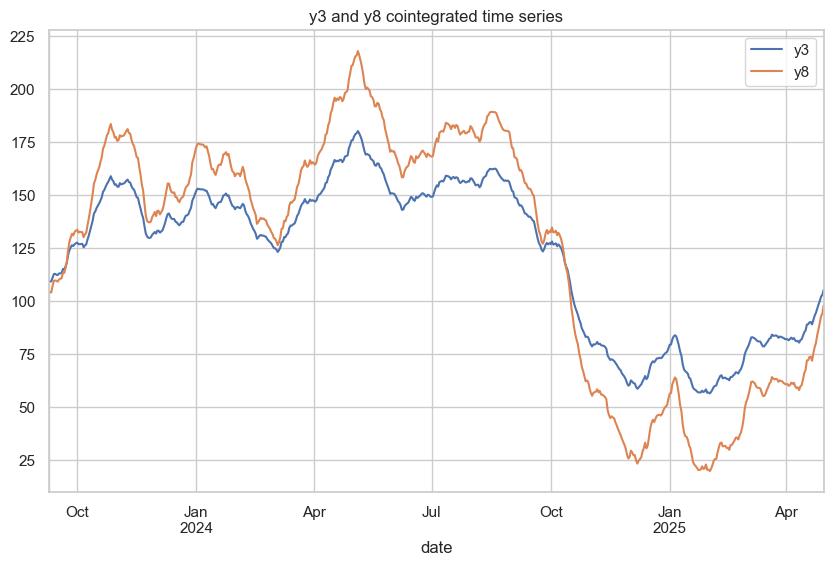

In [ ]:
# Plot `y3` and `y8`
df[['y3', 'y8']].plot(figsize=(10, 6), title="y3 and y8 cointegrated time series")
plt.show() 

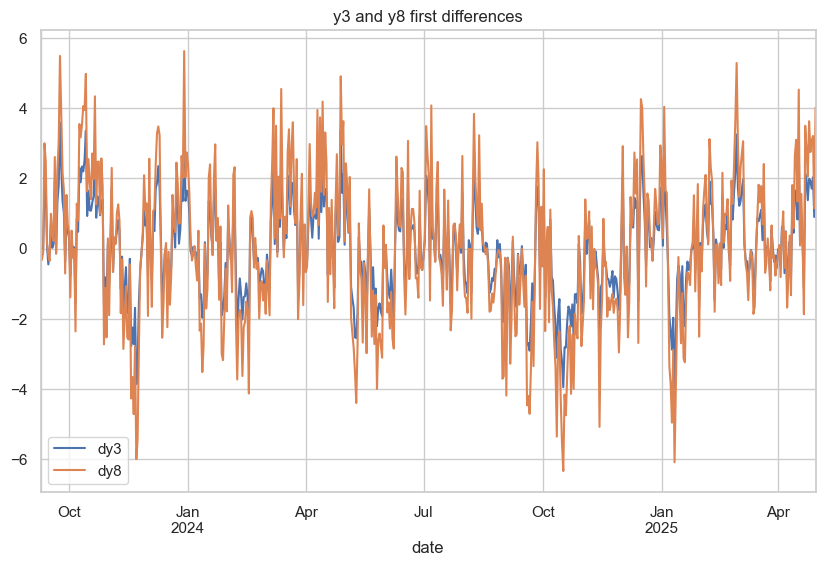

In [68]:
# Plot `dy3` and `dy8`
df[['dy3', 'dy8']].plot(figsize=(10, 6), title="y3 and y8 first differences")
plt.show()

VECM model

In [69]:
# Granger causality tests
grangercausalitytests(df[['y3', 'y8']].dropna(), maxlag=5) #H0: no granger causality


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2652  , p=0.6068  , df_denom=596, df_num=1
ssr based chi2 test:   chi2=0.2665  , p=0.6057  , df=1
likelihood ratio test: chi2=0.2665  , p=0.6057  , df=1
parameter F test:         F=0.2652  , p=0.6068  , df_denom=596, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1452  , p=0.8648  , df_denom=593, df_num=2
ssr based chi2 test:   chi2=0.2929  , p=0.8638  , df=2
likelihood ratio test: chi2=0.2929  , p=0.8638  , df=2
parameter F test:         F=0.1452  , p=0.8648  , df_denom=593, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2834  , p=0.8374  , df_denom=590, df_num=3
ssr based chi2 test:   chi2=0.8603  , p=0.8350  , df=3
likelihood ratio test: chi2=0.8597  , p=0.8351  , df=3
parameter F test:         F=0.2834  , p=0.8374  , df_denom=590, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3042  , p=0.8752  

{1: ({'ssr_ftest': (0.2651941417279656, 0.6067648853736204, 596.0, 1),
   'ssr_chi2test': (0.2665290115688782, 0.6056697020573769, 1),
   'lrtest': (0.26646973222977977, 0.605709797565491, 1),
   'params_ftest': (0.2651941417283818, 0.6067648853733958, 596.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.14524305494456063, 0.8648428262799449, 593.0, 2),
   'ssr_chi2test': (0.2929354025526046, 0.863753630024069, 2),
   'lrtest': (0.2928636775218365, 0.8637846069573658, 2),
   'params_ftest': (0.14524305494489684, 0.8648428262796316, 593.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.2834033806660931, 0.8373976755332482, 590.0, 3),
   'ssr_chi2test': (0.8602973809711402, 0.834996821177352, 3),
   'lrtest': (0.8596781168728285, 0.8351458561283455, 3),
   'params_ftest': (0.2834033806651535, 0.8373976755339272, 590.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [70]:
#Result: We fail to reject the null of no causality at the 5% level for each lags. 
#Hence, y3 is not a Granger cause of y8.

In [71]:
# Opposite relation
grangercausalitytests(df[['y8', 'y3']].dropna(), maxlag=5) #H0: no granger causality


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1901  , p=0.0746  , df_denom=596, df_num=1
ssr based chi2 test:   chi2=3.2061  , p=0.0734  , df=1
likelihood ratio test: chi2=3.1976  , p=0.0737  , df=1
parameter F test:         F=3.1901  , p=0.0746  , df_denom=596, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.6489 , p=0.0000  , df_denom=593, df_num=2
ssr based chi2 test:   chi2=29.5448 , p=0.0000  , df=2
likelihood ratio test: chi2=28.8381 , p=0.0000  , df=2
parameter F test:         F=14.6489 , p=0.0000  , df_denom=593, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.4039  , p=0.0000  , df_denom=590, df_num=3
ssr based chi2 test:   chi2=25.5109 , p=0.0000  , df=3
likelihood ratio test: chi2=24.9809 , p=0.0000  , df=3
parameter F test:         F=8.4039  , p=0.0000  , df_denom=590, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.3137  , p=0.0001  

{1: ({'ssr_ftest': (3.1900512769464537, 0.07459595529033708, 596.0, 1),
   'ssr_chi2test': (3.2061085820317548, 0.07336377524050412, 1),
   'lrtest': (3.197558832508548, 0.07374827436018154, 1),
   'params_ftest': (3.190051276945654, 0.07459595529037737, 596.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (14.648888448299868, 6.169295930797779e-07, 593.0, 2),
   'ssr_chi2test': (29.544807055930256, 3.840843957280361e-07, 2),
   'lrtest': (28.83814346337431, 5.468606983926047e-07, 2),
   'params_ftest': (14.648888448299854, 6.169295930798173e-07, 593.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (8.403928469987775, 1.7763576856449353e-05, 590.0, 3),
   'ssr_chi2test': (25.510908287708656, 1.2072565937031205e-05, 3),
   'lrtest': (24.980890773446845, 1.558320205384274e-05, 3),
   'params_ftest': (8.403928469988152, 1.7763576856440046e-05, 590.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.

In [72]:


#Result: We reject the null of no causality at the 5% level for models with 2,3,4 lags. For 1 lag, we fail to reject the null with 5% level and reject with 10% level.
#Hence, y8 is a Granger cause of y3.(the relationship is not certain)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2023-09-09 to 2025-04-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y3      600 non-null    float64
 1   y8      600 non-null    float64
 2   dy3     599 non-null    float64
 3   dy8     599 non-null    float64
 4   lresid  599 non-null    float64
dtypes: float64(5)
memory usage: 28.1 KB


In [74]:
#VAR preliminary model preparation

df_var = df.drop(columns=[col for col in df.columns if col not in ['y3', 'y8']])

# Fit a VAR model to the data
model = VAR(df_var)
results = model.select_order(maxlags=15)
print("\nLag selection results:")
print(results.summary())


Lag selection results:
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        3.911       3.926       49.95       3.917
1       -2.731      -2.686     0.06516      -2.713
2       -3.237      -3.163     0.03926      -3.208
3       -3.277     -3.173*     0.03774     -3.236*
4      -3.279*      -3.144    0.03767*      -3.226
5       -3.270      -3.106     0.03799      -3.206
6       -3.262      -3.068     0.03830      -3.187
7       -3.261      -3.036     0.03837      -3.173
8       -3.260      -3.005     0.03841      -3.161
9       -3.252      -2.968     0.03868      -3.142
10      -3.242      -2.928     0.03908      -3.120
11      -3.232      -2.888     0.03949      -3.098
12      -3.220      -2.846     0.03998      -3.074
13      -3.217      -2.813     0.04009      -3.060
14      -3.208      -2.774     0.04046      -3.039
15      -3.208      -2.745     0.04043      -3.028
-------

Information criteria for different lag orders:
  aic bic hqic fpe
1   1   1    1   1
2   2   2    2   2
3   3   3    3   3
4   4   3    3   4
5   4   3    3   4
6   4   3    3   4


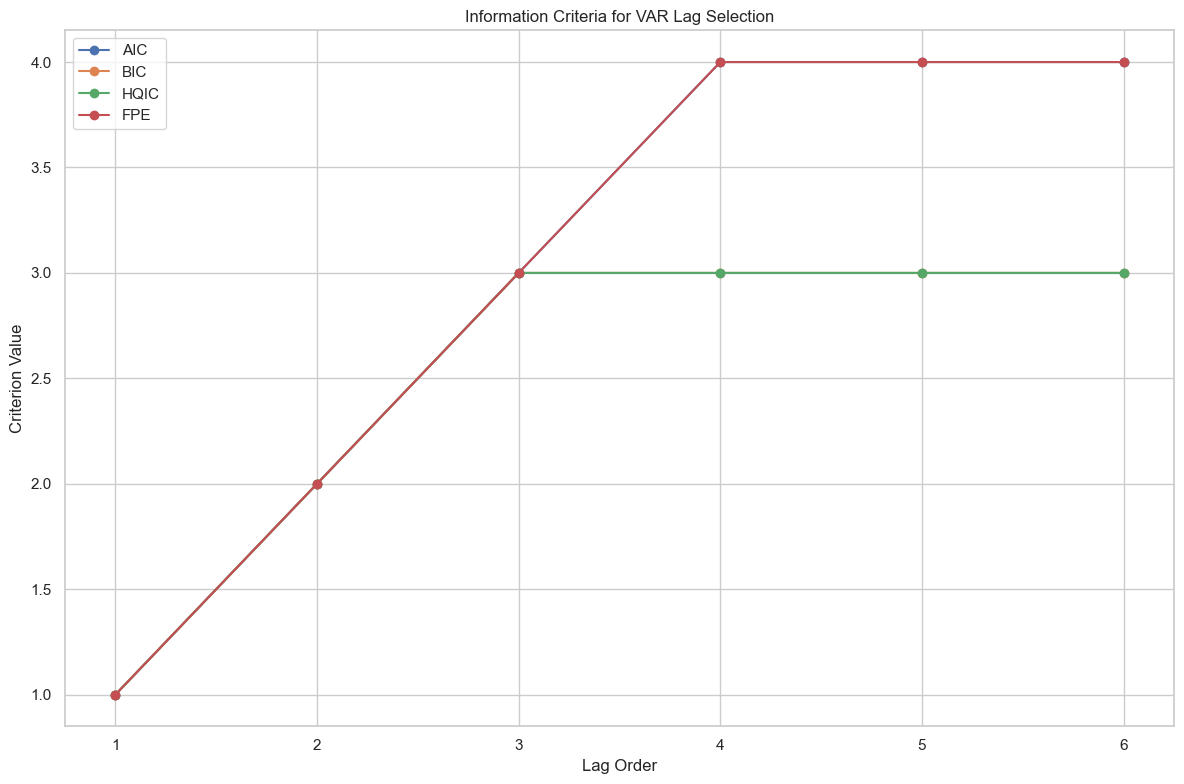

In [75]:
# Function to select optimal lag order
def select_var_order(data, max_lags=12):
    # Create a VAR model
    model = VAR(data)
    
    # Determine information criteria for different lag orders
    results = {}
    for i in range(1, max_lags + 1):
        results[i] = model.select_order(i)
    
    # Create a DataFrame to display the results
    criteria = ['aic', 'bic', 'hqic', 'fpe']
    order_df = pd.DataFrame(index=range(1, max_lags + 1), columns=criteria)
    
    for i in range(1, max_lags + 1):
        for criterion in criteria:
            order_df.loc[i, criterion] = getattr(results[i], criterion)
    
    return order_df

# Select optimal lag order
lag_order_results = select_var_order(df_var, max_lags=6)
print("Information criteria for different lag orders:")
print(lag_order_results)

# Plot the information criteria
plt.figure(figsize=(12, 8))
for column in lag_order_results.columns:
    plt.plot(lag_order_results.index, lag_order_results[column], marker='o', label=column.upper())
plt.xlabel('Lag Order')
plt.ylabel('Criterion Value')
plt.title('Information Criteria for VAR Lag Selection')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
#Basing on a plot: lag=4

In [77]:
# Fit VAR(4) model
var4_model = VAR(df_var)
var4_results = var4_model.fit(4)

# Print model summary
print(var4_results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 06, Jun, 2025
Time:                     08:35:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -3.14438
Nobs:                     596.000    HQIC:                  -3.22534
Log likelihood:          -696.837    FPE:                  0.0377426
AIC:                     -3.27697    Det(Omega_mle):       0.0366280
--------------------------------------------------------------------
Results for equation y3
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const       -27.484077        29.700220           -0.925           0.355
L1.y3         1.682579         0.333694            5.042           0.000
L1.y8        -0.130104         0.206474           -0.630           0.529
L2.y3        -0.090190

#opis

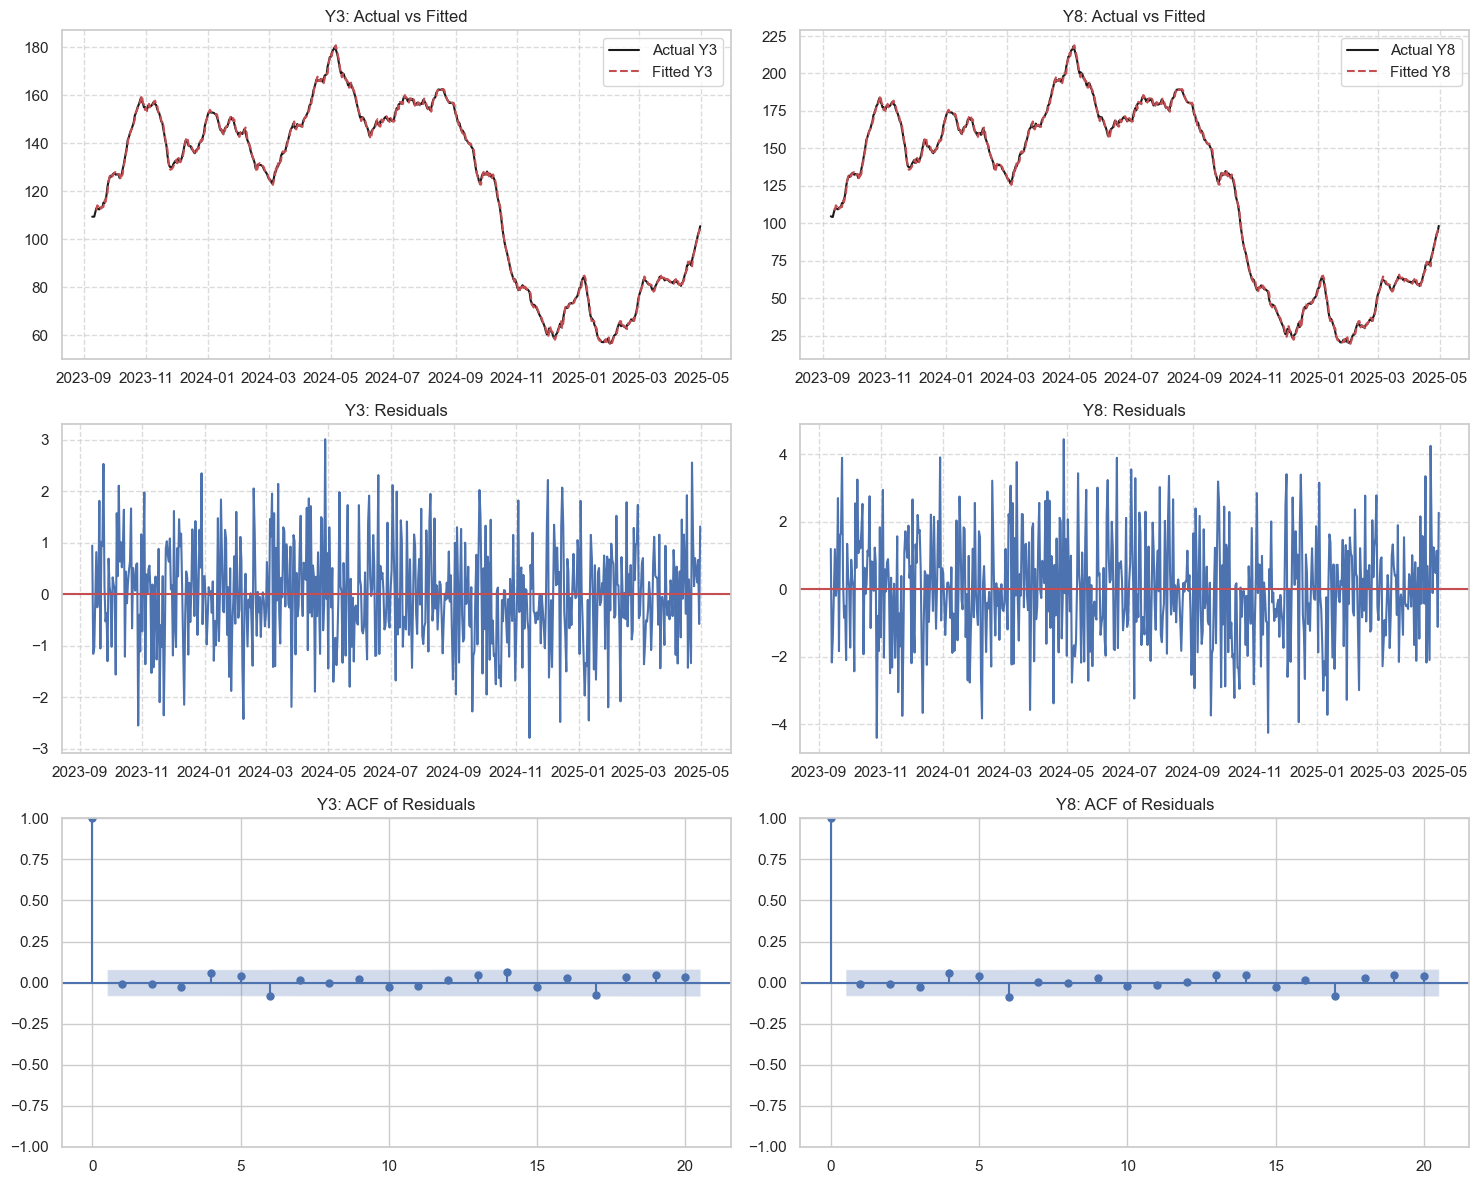

In [78]:
#VAR model diagnostics
# Plot fitted values vs actual values, residuals, and ACF/PACF
fig = plt.figure(figsize=(15, 12))

# Fitted values vs actual values for each variable
for i, name in enumerate(df_var.columns):
    ax = fig.add_subplot(3, 2, i+1)
    ax.plot(df_var.index, df_var[name], 'k-', label=f'Actual {name.upper()}')
    ax.plot(var4_results.fittedvalues[name].index, var4_results.fittedvalues[name], 'r--', 
            label=f'Fitted {name.upper()}')
    ax.set_title(f'{name.upper()}: Actual vs Fitted')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Residuals for each variable
for i, name in enumerate(df_var.columns):
    ax = fig.add_subplot(3, 2, i+3)
    residuals = var4_results.resid[name]
    ax.plot(residuals.index, residuals, 'b-')
    ax.axhline(y=0, color='r', linestyle='-')
    ax.set_title(f'{name.upper()}: Residuals')
    ax.grid(True, linestyle='--', alpha=0.7)

# ACF and PACF for residuals
for i, name in enumerate(df_var.columns):
    ax = fig.add_subplot(3, 2, i+5)
    residuals = var4_results.resid[name].values
    plot_acf(residuals, ax=ax, lags=20, alpha=0.05, title=f'{name.upper()}: ACF of Residuals')

plt.tight_layout()
plt.show() #ACF: lag=8 should be included?

In [79]:
# Perform Ljung-Box test for autocorrelation of residuals (equivalent to Portmanteau test)
residuals = var4_results.resid

print("Ljung-Box Test for Residual Autocorrelation:")
for name in residuals.columns:
    lb_test = acorr_ljungbox(residuals[name], lags=[12, 24])
    print(f"\n{name.upper()} series:")
    print(f"Lag 12: p-value = {lb_test.iloc[0, 1]:.4f}")
    print(f"Lag 24: p-value = {lb_test.iloc[1, 1]:.4f}")

Ljung-Box Test for Residual Autocorrelation:

Y3 series:
Lag 12: p-value = 0.7251
Lag 24: p-value = 0.6631

Y8 series:
Lag 12: p-value = 0.7108
Lag 24: p-value = 0.6816


In [80]:
#Result: no autocorrelation in residuals for each lag and variable, so we can proceed with the model

In [81]:
#Why such a VAR model estimation? For VECM Johansen Cointegration test!
# Perform Johansen test
# K=4 in levels VAR -> k_ar_diff = K-1 = 3 lags in VECM differences
# ecdet = "const" -> det_order = 0 (constant in CE)

data_for_test = df_var[['y3', 'y8']]
johansen_result = coint_johansen(data_for_test, det_order=0, k_ar_diff=3)

print("Johansen Test Results:")
print("Eigenvalues:")
print(johansen_result.eig)
print("\nTrace Statistic:")
print(johansen_result.lr1)
print("\nCritical Values (90%, 95%, 99%) for Trace Statistic:")
print(johansen_result.cvt)
print("\nMaximum Eigenvalue Statistic:")
print(johansen_result.lr2)
print("\nCritical Values (90%, 95%, 99%) for Max Eigenvalue Statistic:")
print(johansen_result.cvm)

Johansen Test Results:
Eigenvalues:
[0.2167409  0.00275495]

Trace Statistic:
[147.24208801   1.64421543]

Critical Values (90%, 95%, 99%) for Trace Statistic:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Maximum Eigenvalue Statistic:
[145.59787258   1.64421543]

Critical Values (90%, 95%, 99%) for Max Eigenvalue Statistic:
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


In [82]:
#Automation of Johansen interpretation
print("--- Interpretation (Trace Test) ---")
hypotheses_trace = ['r <= 0', 'r <= 1']
for i in range(len(hypotheses_trace)):
    print(f"H0: {hypotheses_trace[i]}")
    print(f"  Trace Statistic: {johansen_result.lr1[i]:.3f}")
    print(f"  Critical Value (95%): {johansen_result.cvt[i, 1]:.3f}")
    if johansen_result.lr1[i] > johansen_result.cvt[i, 1]:
        print("  Result: Reject H0 at 5% significance level.")
    else:
        print("  Result: Cannot reject H0 at 5% significance level.")

print("\n--- Interpretation (Max Eigenvalue Test) ---")
hypotheses_maxeig = ['r = 0', 'r = 1'] # H0: rank is r vs H1: rank is r+1
for i in range(len(hypotheses_maxeig)):
    print(f"H0: {hypotheses_maxeig[i]}")
    print(f"  Max Eigenvalue Statistic: {johansen_result.lr2[i]:.3f}")
    print(f"  Critical Value (95%): {johansen_result.cvm[i, 1]:.3f}")
    if johansen_result.lr2[i] > johansen_result.cvm[i, 1]:
        print("  Result: Reject H0 at 5% significance level.")
    else:
        print("  Result: Cannot reject H0 at 5% significance level.")

--- Interpretation (Trace Test) ---
H0: r <= 0
  Trace Statistic: 147.242
  Critical Value (95%): 15.494
  Result: Reject H0 at 5% significance level.
H0: r <= 1
  Trace Statistic: 1.644
  Critical Value (95%): 3.841
  Result: Cannot reject H0 at 5% significance level.

--- Interpretation (Max Eigenvalue Test) ---
H0: r = 0
  Max Eigenvalue Statistic: 145.598
  Critical Value (95%): 14.264
  Result: Reject H0 at 5% significance level.
H0: r = 1
  Max Eigenvalue Statistic: 1.644
  Critical Value (95%): 3.841
  Result: Cannot reject H0 at 5% significance level.


In [83]:
#exactly one cointegration vector

In [84]:
print("Eigenvectors (columns are potential cointegrating vectors, ordered by eigenvalue):")
print(johansen_result.evec)

print("\nCointegrating Vector (beta - first column of eigenvectors):")
coint_vector_raw = johansen_result.evec[:, 0]
print(coint_vector_raw)

# Normalize the first element to 1 for potentially easier interpretation
coint_vector_normalized = coint_vector_raw / coint_vector_raw[0]
print("\nCointegrating Vector (beta, normalized with ppi coefficient = 1):")
print(coint_vector_normalized)

Eigenvectors (columns are potential cointegrating vectors, ordered by eigenvalue):
[[ 16.76156669  -0.11036398]
 [-10.47523735   0.05147766]]

Cointegrating Vector (beta - first column of eigenvectors):
[ 16.76156669 -10.47523735]

Cointegrating Vector (beta, normalized with ppi coefficient = 1):
[ 1.         -0.62495574]


In [85]:
# Estimate VECM
vecm_model = VECM(data_for_test, k_ar_diff=3, coint_rank=1, deterministic='ci')
vecm_results = vecm_model.fit()

In [86]:
print(vecm_results.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation y3
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y3          0.0548      0.578      0.095      0.925      -1.079       1.188
L1.y8          0.2638      0.360      0.733      0.463      -0.441       0.969
L2.y3         -0.0363      0.468     -0.078      0.938      -0.953       0.880
L2.y8          0.1292      0.291      0.444      0.657      -0.441       0.699
L3.y3          0.1083      0.329      0.330      0.742      -0.536       0.752
L3.y8         -0.0068      0.204     -0.033      0.973      -0.408       0.394
Det. terms outside the coint. relation & lagged endog. parameters for equation y8
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y3         -0.0039      0.936     -0.004   

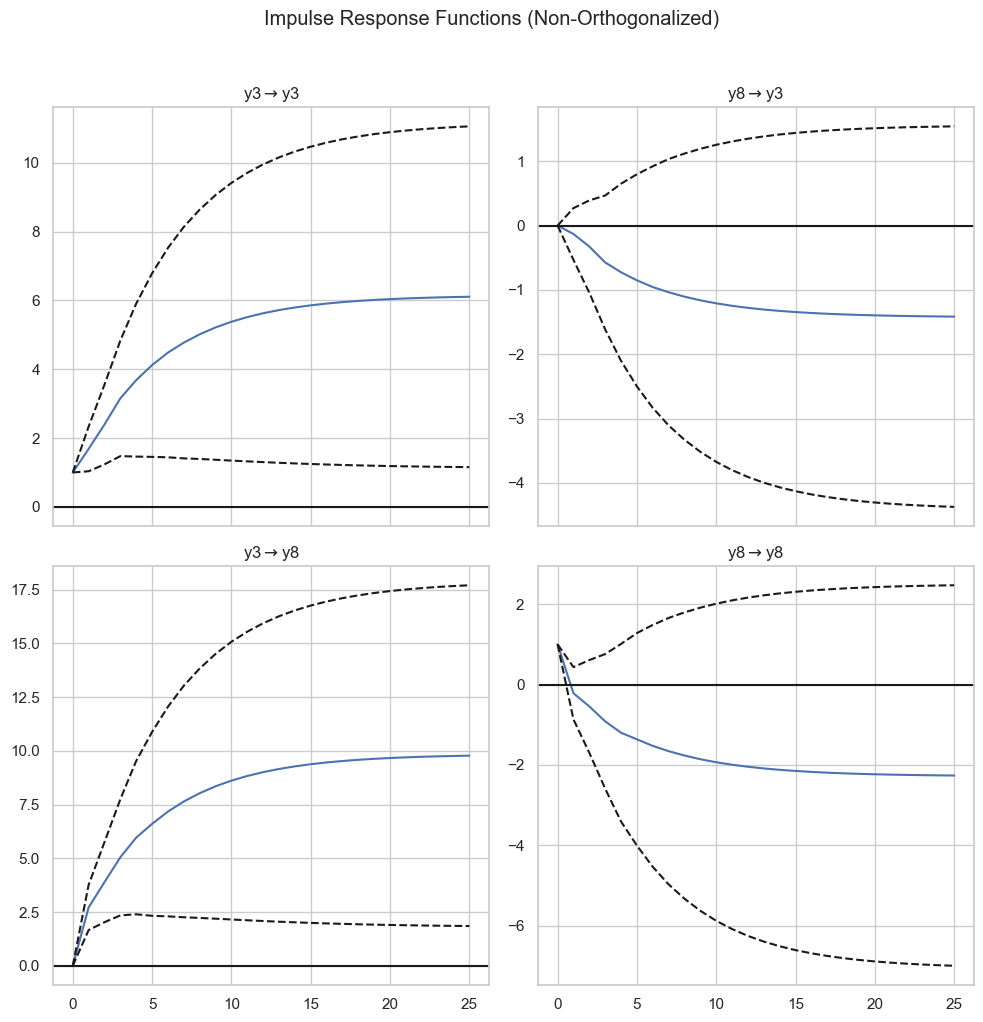

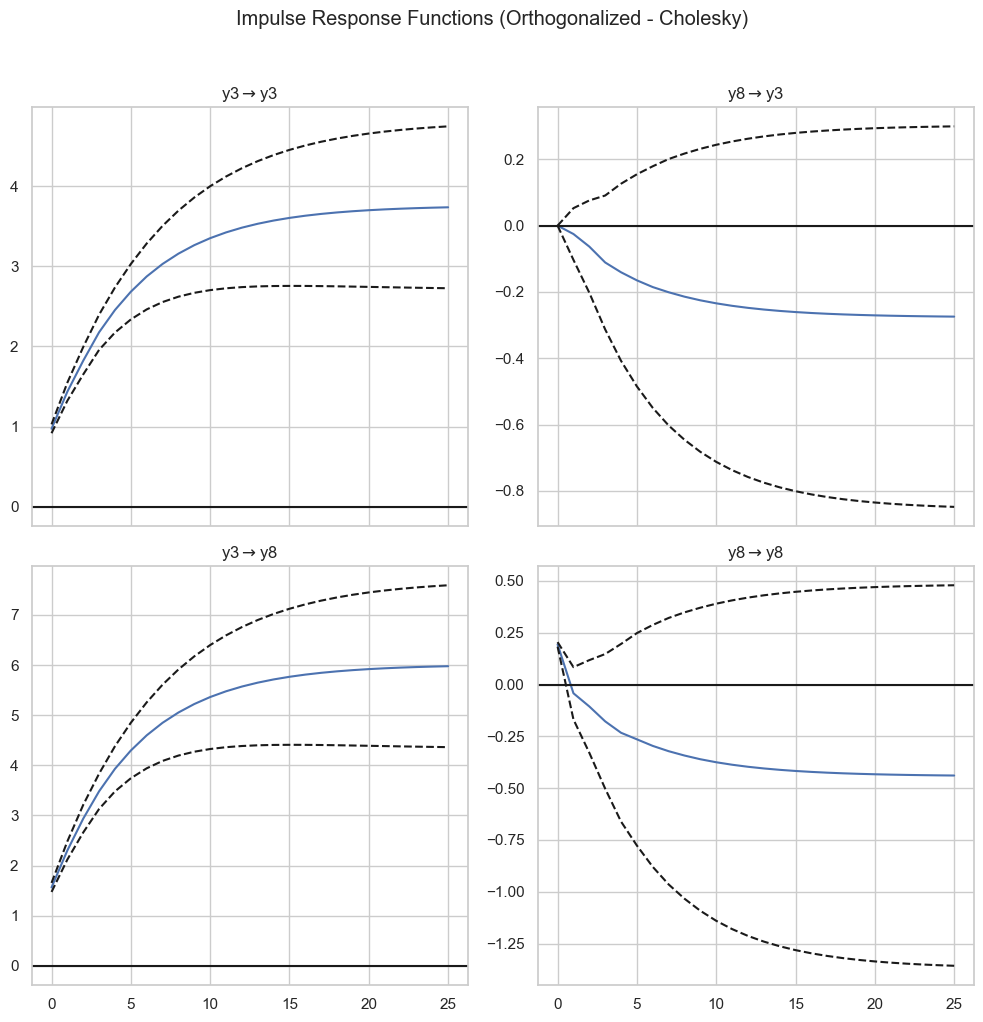

In [87]:
#Interpretation and evaluation
# Calculate and plot IRFs
irf = vecm_results.irf(periods=25) #tak jest w porządku?

# Non-orthogonalized IRFs
irf.plot(orth=False)
plt.suptitle('Impulse Response Functions (Non-Orthogonalized)', y=1.02)
plt.tight_layout()
plt.show()

# Orthogonalized IRFs (using Cholesky decomposition by default)
irf.plot(orth=True)
plt.suptitle('Impulse Response Functions (Orthogonalized - Cholesky)', y=1.02)
plt.tight_layout()
plt.show()

In [88]:
# Estimate VAR
var_model = VAR(data_for_test)
var_results = var_model.fit(4)

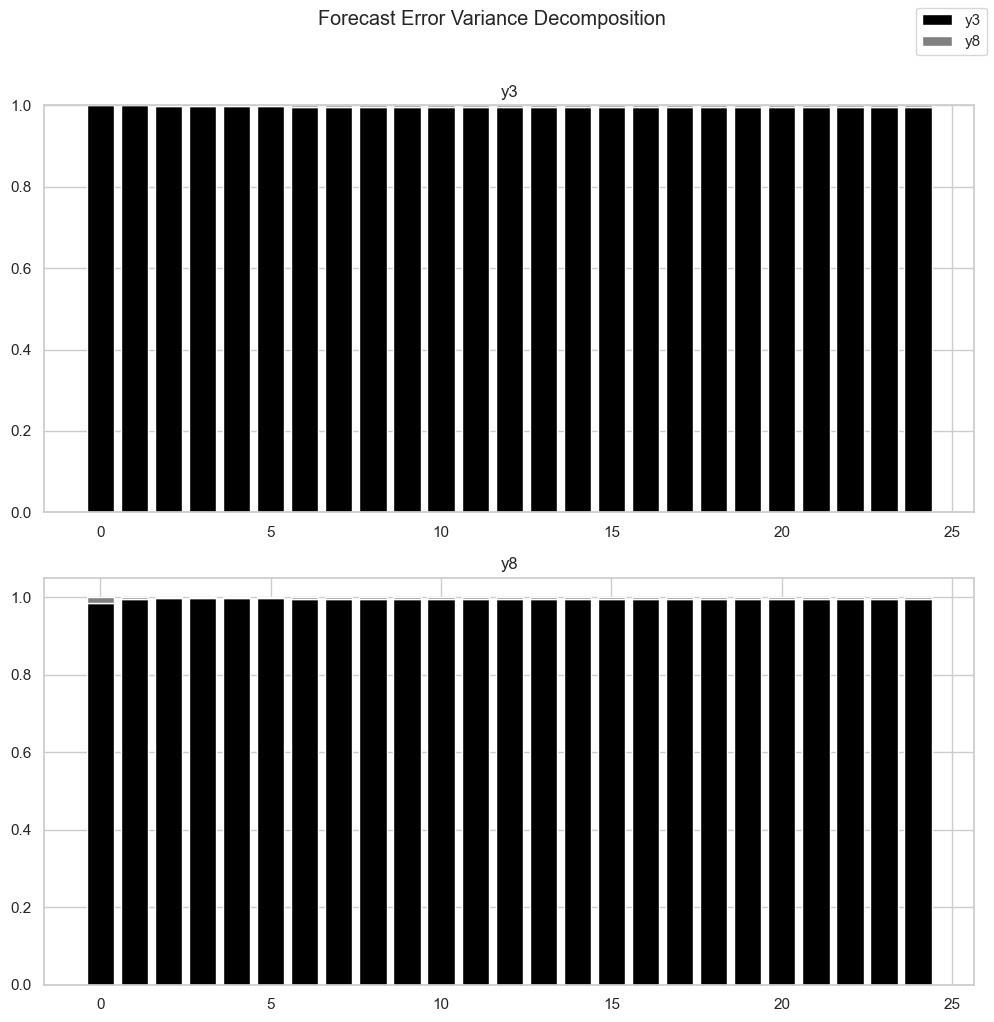


FEVD Summary (Period 25):
FEVD for y3
            y3        y8
0     1.000000  0.000000
1     0.999788  0.000212
2     0.999269  0.000731
3     0.998472  0.001528
4     0.997862  0.002138
5     0.997385  0.002615
6     0.997002  0.002998
7     0.996702  0.003298
8     0.996457  0.003543
9     0.996255  0.003745
10    0.996086  0.003914
11    0.995943  0.004057
12    0.995821  0.004179
13    0.995716  0.004284
14    0.995625  0.004375
15    0.995546  0.004454
16    0.995477  0.004523
17    0.995416  0.004584
18    0.995362  0.004638
19    0.995314  0.004686
20    0.995271  0.004729
21    0.995232  0.004768
22    0.995198  0.004802
23    0.995166  0.004834
24    0.995138  0.004862

FEVD for y8
            y3        y8
0     0.984801  0.015199
1     0.994915  0.005085
2     0.996903  0.003097
3     0.997115  0.002885
4     0.996905  0.003095
5     0.996709  0.003291
6     0.996500  0.003500
7     0.996309  0.003691
8     0.996141  0.003859
9     0.995992  0.004008
10    0.995863  0.00413

In [89]:
# Calculate and plot FEVD
fevd = var_results.fevd(periods=25) #?right number of periods?
fevd.plot()
plt.suptitle('Forecast Error Variance Decomposition', y=1.02)
plt.tight_layout()
plt.show()

# Print FEVD summary for the last period
print("\nFEVD Summary (Period 25):")
print(fevd.summary())

In [90]:
residuals = vecm_results.resid
# to DataFrame
residuals = pd.DataFrame(residuals, columns=['y3', 'y8'], index=df.index[4:])
print("Residuals (first 5 rows):")
print(residuals.head())

# Test for serial correlation (Ljung-Box test on residuals)
# Apply to each residual series separately
print("\nLjung-Box Test for Serial Correlation in Residuals (lag=10):")
ljung_box_y8 = acorr_ljungbox(residuals['y8'], lags=[10], return_df=True)
ljung_box_y3 = acorr_ljungbox(residuals['y3'], lags=[10], return_df=True)
print("\ny8 Residuals:\n", ljung_box_y8)
print("\ny3 Residuals:\n", ljung_box_y3)

# Check p-values
alpha_serial = 0.05
print(f"\nConclusion at alpha={alpha_serial}:")
if ljung_box_y8['lb_pvalue'].iloc[0] < alpha_serial:
    print(" - Reject H0 (no serial correlation) for y8 residuals.")
else:
    print(" - Cannot reject H0 (no serial correlation) for y8 residuals.")
if ljung_box_y3['lb_pvalue'].iloc[0] < alpha_serial:
    print(" - Reject H0 (no serial correlation) for y3 residuals.")
else:
    print(" - Cannot reject H0 (no serial correlation) for y3 residuals.")

Residuals (first 5 rows):
                      y3            y8
date                                  
2023-09-13  0.9589545854  1.2168454044
2023-09-14 -1.1447274118 -2.1456542710
2023-09-15 -1.0183648309 -1.4043300818
2023-09-16 -0.0987122790 -0.1039733336
2023-09-17  0.8322826367  1.2067684950

Ljung-Box Test for Serial Correlation in Residuals (lag=10):

y8 Residuals:
         lb_stat    lb_pvalue
10 8.7482746177 0.5561483377

y3 Residuals:
         lb_stat    lb_pvalue
10 8.3462904907 0.5950514177

Conclusion at alpha=0.05:
 - Cannot reject H0 (no serial correlation) for y8 residuals.
 - Cannot reject H0 (no serial correlation) for y3 residuals.


In [91]:
# Create shorter sample (excluding last 25 observations)
n_forecast = 25
df_short = data_for_test.iloc[:-n_forecast]
df_actual = data_for_test.iloc[-n_forecast:]
print("Last few rows of shorter sample:")
print(df_short.tail())
print("\nActual values for forecast period:")
print(df_actual.head())

Last few rows of shorter sample:
                      y3            y8
date                                  
2025-04-01 82.2000000000 60.9000000000
2025-04-02 82.1600000000 61.0000000000
2025-04-03 81.6600000000 60.1900000000
2025-04-04 82.2800000000 60.6200000000
2025-04-05 82.9000000000 61.6800000000

Actual values for forecast period:
                      y3            y8
date                                  
2025-04-06 82.2000000000 61.1300000000
2025-04-07 82.6900000000 61.6000000000
2025-04-08 81.5900000000 59.9200000000
2025-04-09 81.1900000000 59.1000000000
2025-04-10 81.3900000000 59.4700000000


In [92]:
# Re-run Johansen test on shorter sample
johansen_result_short = coint_johansen(df_short, det_order=0, k_ar_diff=3)

print("\nJohansen Test on Shorter Sample (Trace Statistic):")
print("Trace Statistic:", johansen_result_short.lr1)
print("Critical Values (95%):", johansen_result_short.cvt[:, 1])

# Determine rank based on test
rank_short = 0
for i in range(len(johansen_result_short.lr1)):
    if johansen_result_short.lr1[i] > johansen_result_short.cvt[i, 1]:
        rank_short = i + 1
    else:
        break
print(f"--> Determined Cointegration Rank on shorter sample: r = {rank_short}")

# Assuming rank is still 1 based on R output/consistency, proceed with r=1
rank_short = 1 # Override if necessary based on re-evaluation
print(f"Proceeding with rank r = {rank_short} for forecasting model.")


Johansen Test on Shorter Sample (Trace Statistic):
Trace Statistic: [140.03017507   0.9990293 ]
Critical Values (95%): [15.4943  3.8415]
--> Determined Cointegration Rank on shorter sample: r = 1
Proceeding with rank r = 1 for forecasting model.


In [93]:
# Re-estimate VECM on shorter sample
vecm_model_short = VECM(df_short, k_ar_diff=3, coint_rank=rank_short, deterministic='ci')
vecm_results_short = vecm_model_short.fit()

# Generate forecasts
forecast_values = vecm_results_short.predict(steps=n_forecast)
forecast_intervals = vecm_results_short.predict(steps=n_forecast, alpha=0.05) # alpha=0.05 for 95% CI

# Create forecast DataFrame
forecast_index = df_actual.index
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['y3_fore', 'y8_fore'])


In [94]:
print(forecast_df)

                 y3_fore       y8_fore
date                                  
2025-04-06 83.3082495595 62.6769872195
2025-04-07 83.7391468968 63.3437800777
2025-04-08 84.0974818396 63.9217376155
2025-04-09 84.3665307589 64.3526491109
2025-04-10 84.5904793081 64.6977285164
2025-04-11 84.7721969023 64.9887293975
2025-04-12 84.9194421083 65.2249508392
2025-04-13 85.0406062505 65.4186355758
2025-04-14 85.1394795757 65.5771775436
2025-04-15 85.2201425762 65.7062033822
2025-04-16 85.2860357426 65.8115338884
2025-04-17 85.3397957823 65.8975159187
2025-04-18 85.3836759509 65.9676846058
2025-04-19 85.4194993522 66.0249764011
2025-04-20 85.4487407077 66.0717456196
2025-04-21 85.4726111119 66.1099224577
2025-04-22 85.4920968891 66.1410868578
2025-04-23 85.5080029981 66.1665260877
2025-04-24 85.5209872110 66.1872920597
2025-04-25 85.5315862477 66.2042434258
2025-04-26 85.5402382515 66.2180808549
2025-04-27 85.5473009078 66.2293763862
2025-04-28 85.5530661708 66.2385969600
2025-04-29 85.5577723678 

In [95]:
# Create forecast interval DataFrames
forecast_lower = pd.DataFrame(forecast_intervals[1], index=forecast_index, columns=['y3_lower', 'y8_lower'])
forecast_upper = pd.DataFrame(forecast_intervals[2], index=forecast_index, columns=['y3_upper', 'y8_upper'])

# Combine forecasts and intervals
forecast_combined = pd.concat([forecast_df, forecast_lower, forecast_upper], axis=1)
print("\nForecasts and Confidence Intervals:")
print(forecast_combined)


Forecasts and Confidence Intervals:
                 y3_fore       y8_fore      y3_lower      y8_lower       y3_upper       y8_upper
date                                                                                            
2025-04-06 83.3082495595 62.6769872195 81.4080712495 59.6026582591  85.2084278695  65.7513161799
2025-04-07 83.7391468968 63.3437800777 80.3284385057 57.8605976977  87.1498552878  68.8269624577
2025-04-08 84.0974818396 63.9217376155 79.1496340861 55.9595762137  89.0453295932  71.8838990173
2025-04-09 84.3665307589 64.3526491109 77.8329045660 53.8703313251  90.9001569519  74.8349668968
2025-04-10 84.5904793081 64.6977285164 76.4831906603 51.7019041316  92.6977679559  77.6935529012
2025-04-11 84.7721969023 64.9887293975 75.1228573359 49.5275855135  94.4215364686  80.4498732815
2025-04-12 84.9194421083 65.2249508392 73.7671040726 47.3618183275  96.0717801441  83.0880833509
2025-04-13 85.0406062505 65.4186355758 72.4318347977 45.2264715182  97.6493777033  85.6107

In [96]:
df_var.head()

,y3,y8
date,,
2023-09-09,109.4100000000,104.6600000000
2023-09-10,109.4100000000,104.3400000000
2023-09-11,109.4100000000,104.2300000000
2023-09-12,111.1200000000,107.2300000000
2023-09-13,112.9200000000,109.7100000000


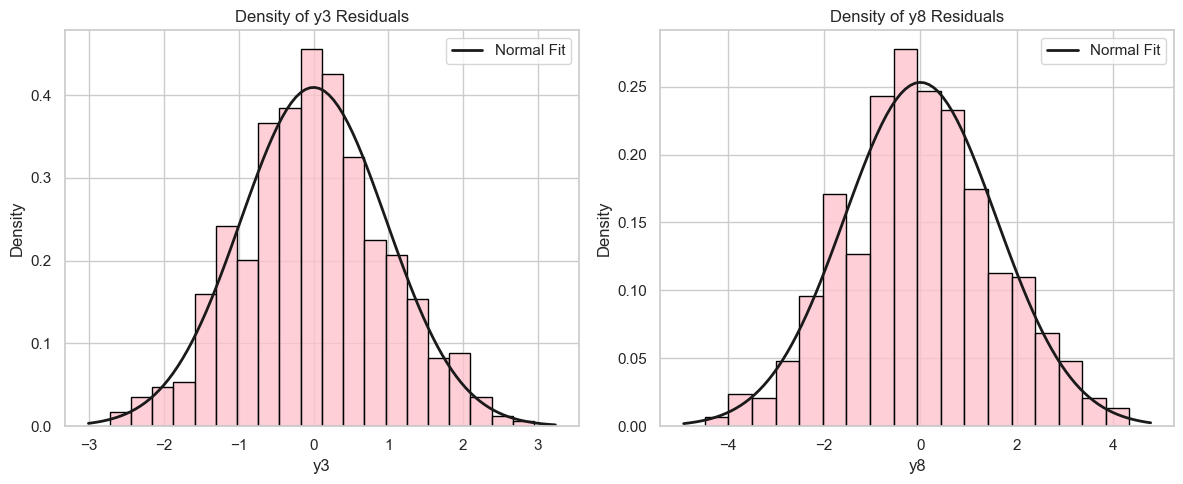

In [97]:
# Plot histograms of residuals with normal density overlay
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(residuals['y3'], kde=False, stat='density', ax=axes[0], color='pink', edgecolor='black')
axes[0].set_title('Density of y3 Residuals')
# Overlay normal distribution
mu_y3, std_y3 = residuals['y3'].mean(), residuals['y3'].std()
xmin_y3, xmax_y3 = axes[0].get_xlim()
x_y3 = np.linspace(xmin_y3, xmax_y3, 100)
p_y3 = norm.pdf(x_y3, mu_y3, std_y3)
axes[0].plot(x_y3, p_y3, 'k', linewidth=2, label='Normal Fit')
axes[0].legend()

sns.histplot(residuals['y8'], kde=False, stat='density', ax=axes[1], color='pink', edgecolor='black')
axes[1].set_title('Density of y8 Residuals')
# Overlay normal distribution
mu_y8, std_y8 = residuals['y8'].mean(), residuals['y8'].std()
xmin_y8, xmax_y8 = axes[1].get_xlim()
x_y8 = np.linspace(xmin_y8, xmax_y8, 100)
p_y8 = norm.pdf(x_y8, mu_y8, std_y8)
axes[1].plot(x_y8, p_y8, 'k', linewidth=2, label='Normal Fit')
axes[1].legend()

plt.tight_layout()
plt.show()

In [98]:
# Test for normality (Jarque-Bera test)
jb_y3_stat, jb_y3_pval, _, _ = jarque_bera(residuals['y3'])
jb_y8_stat, jb_y8_pval, _, _ = jarque_bera(residuals['y8'])

print("\nJarque-Bera Normality Test for Residuals:")
print(f"y3 Residuals: Statistic={jb_y3_stat:.3f}, p-value={jb_y3_pval:.3f}")
print(f"y8 Residuals: Statistic={jb_y8_stat:.3f}, p-value={jb_y8_pval:.3f}")

alpha_norm = 0.05
print(f"\nConclusion at alpha={alpha_norm}:")
if jb_y3_pval < alpha_norm:
    print(" - Reject normality for y3 residuals.")
else:
    print(" - Cannot reject normality for y3 residuals.")
if jb_y8_pval < alpha_norm:
    print(" - Reject normality for y8 residuals.")
else:
    print(" - Cannot reject normality for y8 residuals.")

# Multivariate Normality Test (using VECM Results method)
try:
    normality_test_results = vecm_results.test_normality()
    print("\nMultivariate Normality Test Results (using VECM Results method):")
    print(normality_test_results)
except Exception as e:
    print(f"\nCould not run multivariate normality test directly: {e}")


Jarque-Bera Normality Test for Residuals:
y3 Residuals: Statistic=0.656, p-value=0.720
y8 Residuals: Statistic=1.045, p-value=0.593

Conclusion at alpha=0.05:
 - Cannot reject normality for y3 residuals.
 - Cannot reject normality for y8 residuals.

Multivariate Normality Test Results (using VECM Results method):
<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: fail to reject at 5% significance level. Test statistic: 1.990, critical value: 9.488>, p-value: 0.738>


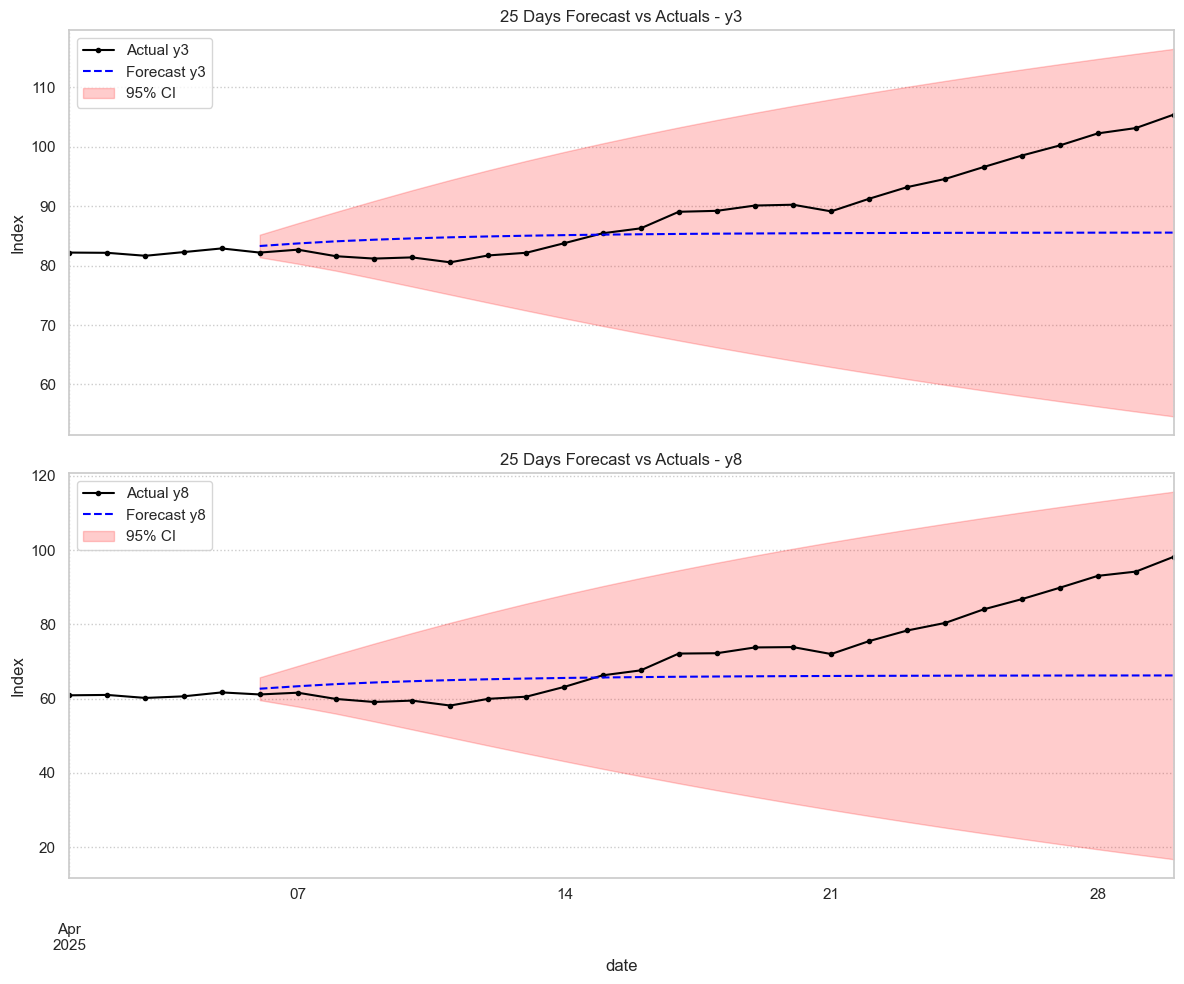

In [99]:
# Merge forecasts with the original data for plotting
df_merged = df_var.merge(forecast_combined, left_index=True, right_index=True, how='left')

# Plot forecasts vs actuals
plot_start_date = '2025-04-01' # Start date for the plot window

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# y3 Plot
df_merged.loc[plot_start_date:, 'y3'].plot(ax=axes[0], label='Actual y3', color='black', marker='.')
df_merged.loc[plot_start_date:, 'y3_fore'].plot(ax=axes[0], label='Forecast y3', color='blue', linestyle='--')
axes[0].fill_between(df_merged.loc[plot_start_date:].index, # Ensure index alignment
                     df_merged.loc[plot_start_date:, 'y3_lower'],
                     df_merged.loc[plot_start_date:, 'y3_upper'], color='red', alpha=0.2, label='95% CI')
axes[0].set_title('25 Days Forecast vs Actuals - y3')
axes[0].set_ylabel('Index')
axes[0].legend()
axes[0].grid(True, linestyle=':')

# y5 Plot
df_merged.loc[plot_start_date:, 'y8'].plot(ax=axes[1], label='Actual y8', color='black', marker='.')
df_merged.loc[plot_start_date:, 'y8_fore'].plot(ax=axes[1], label='Forecast y8', color='blue', linestyle='--')
axes[1].fill_between(df_merged.loc[plot_start_date:].index, # Ensure index alignment
                     df_merged.loc[plot_start_date:, 'y8_lower'],
                     df_merged.loc[plot_start_date:, 'y8_upper'], color='red', alpha=0.2, label='95% CI')
axes[1].set_title('25 Days Forecast vs Actuals - y8')
axes[1].set_ylabel('Index')
axes[1].legend()
axes[1].grid(True, linestyle=':')

plt.tight_layout()
plt.show()

In [100]:
# Combine forecasts and intervals
forecast_combined = pd.concat([forecast_df, forecast_lower, forecast_upper], axis=1)
print("\nForecasts and Confidence Intervals:")
print(forecast_combined)


Forecasts and Confidence Intervals:
                 y3_fore       y8_fore      y3_lower      y8_lower       y3_upper       y8_upper
date                                                                                            
2025-04-06 83.3082495595 62.6769872195 81.4080712495 59.6026582591  85.2084278695  65.7513161799
2025-04-07 83.7391468968 63.3437800777 80.3284385057 57.8605976977  87.1498552878  68.8269624577
2025-04-08 84.0974818396 63.9217376155 79.1496340861 55.9595762137  89.0453295932  71.8838990173
2025-04-09 84.3665307589 64.3526491109 77.8329045660 53.8703313251  90.9001569519  74.8349668968
2025-04-10 84.5904793081 64.6977285164 76.4831906603 51.7019041316  92.6977679559  77.6935529012
2025-04-11 84.7721969023 64.9887293975 75.1228573359 49.5275855135  94.4215364686  80.4498732815
2025-04-12 84.9194421083 65.2249508392 73.7671040726 47.3618183275  96.0717801441  83.0880833509
2025-04-13 85.0406062505 65.4186355758 72.4318347977 45.2264715182  97.6493777033  85.6107

In [101]:
#DOROBIC EVALUATION MATRIX MICHAŁ 

In [102]:
# Generate confidence intervals using the forecast error covariance
# This is a simplification as statsmodels doesn't directly provide confidence intervals

def compute_forecast_ci(model_results, y_values, steps, alpha=0.05):
    """Compute confidence intervals for VAR forecasts"""
    forecast_mean = model_results.forecast(y_values, steps)
    
    # Get forecast error covariance matrix for h-step ahead forecasts
    mse = np.zeros((steps, model_results.neqs, model_results.neqs))
    for i in range(steps):
        mse[i] = model_results.forecast_cov(i+1)[0, :, :] #do zmiany !!!
    
    # Compute standard errors for each forecast
    stderr = np.zeros((steps, model_results.neqs))
    for i in range(steps):
        stderr[i] = np.sqrt(np.diag(mse[i]))
    
    # Compute confidence intervals
    from scipy.stats import norm
    q = norm.ppf(1 - alpha/2)
    lower = forecast_mean - q * stderr
    upper = forecast_mean + q * stderr
    
    return forecast_mean, lower, upper

# Calculate forecast means and 95% confidence intervals
forecast_mean, forecast_lower, forecast_upper = compute_forecast_ci(
    var4_short_results, ppi_cpi_short.values, forecast_horizon, alpha=0.05
)

# Create DataFrames for the confidence intervals
forecast_lower_df = pd.DataFrame(forecast_lower, index=forecast_index, 
                               columns=[f"{col}_lower" for col in ppi_cpi.columns])
forecast_upper_df = pd.DataFrame(forecast_upper, index=forecast_index, 
                               columns=[f"{col}_upper" for col in ppi_cpi.columns])

# Combine the forecasts and actual values
forecast_evaluation = pd.concat([
    ppi_cpi.loc[forecast_index],
    forecast_df,
    forecast_lower_df,
    forecast_upper_df
], axis=1)

forecast_evaluation.columns = [
    'ppi_actual', 'cpi_actual', 
    'ppi_forecast', 'cpi_forecast',
    'ppi_lower', 'cpi_lower',
    'ppi_upper', 'cpi_upper'
]

print("Forecast evaluation dataset:")
print(forecast_evaluation)


NameError: name 'var4_short_results' is not defined

In [ ]:
# Calculate forecast accuracy measures

# Define the function for MAPE and AMAPE
def mape(actual, pred):
    """Mean Absolute Percentage Error"""
    return np.mean(np.abs((actual - pred) / actual)) * 100

def amape(actual, pred):
    """Adjusted/Symmetric Mean Absolute Percentage Error"""
    return np.mean(np.abs((actual - pred) / ((actual + pred) / 2))) * 100

# Calculate metrics for PPI
y3_mae = mean_absolute_error(forecast_combined['y3_actual'], forecast_evaluation['y3_forecast'])
y3_mse = mean_squared_error(forecast_evaluation['y3_actual'], forecast_evaluation['y3_forecast'])
y3_rmse = np.sqrt(y3_mse)
y3_mape = mape(forecast_evaluation['y3_actual'], forecast_evaluation['y3_forecast'])
y3_amape = amape(forecast_evaluation['y3_actual'], forecast_evaluation['y3_forecast'])

# Calculate metrics for CPI
y8_mae = mean_absolute_error(forecast_evaluation['y8_actual'], forecast_evaluation['y8_forecast'])
y8_mse = mean_squared_error(forecast_evaluation['y8_actual'], forecast_evaluation['y8_forecast'])
y8_rmse = np.sqrt(y8_mse)
y8_mape = mape(forecast_evaluation['y8_actual'], forecast_evaluation['y8_forecast'])
y8_amape = amape(forecast_evaluation['y8_actual'], forecast_evaluation['y8_forecast'])

# Create a DataFrame to display the results
metrics_df = pd.DataFrame({
    'y3': [y3_mae, y3_mse, y3_rmse, y3_mape, y3_amape],
    'y8': [y8_mae, y8_mse, y8_rmse, y8_mape, y8_amape]
}, index=['MAE', 'MSE', 'RMSE', 'MAPE (%)', 'AMAPE (%)'])

print("Forecast Accuracy Metrics:")
print(metrics_df)

NameError: name 'forecast_evaluation' is not defined

In [ ]:
#stable predictions

ARIMA models

Starting with modelling y3 out of our y3 and y8 pair 

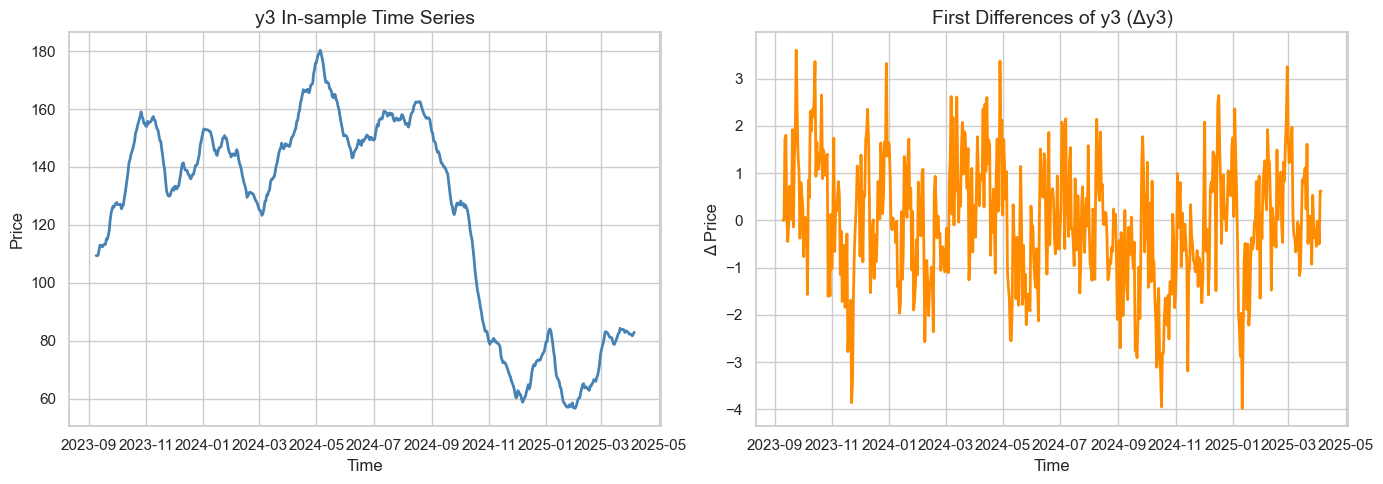

In [111]:

# Original series
y3 = df['y3']
y3_in_sample = y3[:575]

# First difference
dy3_in_sample = y3_in_sample.diff().dropna()

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# --- Left Plot: Original Series ---
axes[0].plot(y3_in_sample, color='steelblue', linewidth=2)
axes[0].set_title("y3 In-sample Time Series", fontsize=14)
axes[0].set_xlabel("Time", fontsize=12)
axes[0].set_ylabel("Price", fontsize=12)
axes[0].grid(True)

# --- Right Plot: First Differences ---
axes[1].plot(dy3_in_sample, color='darkorange', linewidth=2)
axes[1].set_title("First Differences of y3 (Δy3)", fontsize=14)
axes[1].set_xlabel("Time", fontsize=12)
axes[1].set_ylabel("Δ Price", fontsize=12)
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


The series does not look like stationary. Still, it does not appear to include a drift or a deterministic trend. The differences could be stationary, but we will check it with the ADF test.

checking for stationarity with ADF test

In [107]:
def adf_test(series, max_aug=10, version='n'):
    
    results = []

    y = series.diff()
    X = pd.DataFrame({'y_lag': series.shift()})

    if version == 'c' or version == 't': # constant to be added optionally 
        X = sm.add_constant(X)
    if version == 't': # (deterministic) trend component to be added optionally
        X['trend'] = range(len(X))

    for i in range(0, max_aug): # iterating through different numbers of augmentations
        
        for aug in range(1, i+1): # adding augmentations one by one until its current amount is reached
            X['aug_'+str(aug)] = y.shift(aug)

        model = sm.OLS(series.diff(), X, missing='drop').fit() # fitting a linear regression with OLS

        ts = model.tvalues['y_lag'] # test statistic
        nobs = model.nobs # number of observations

        if version == 'n': # critical values for basic version of ADF
            if nobs > 500:
                cv1 = -2.567; cv5 = -1.941; cv10 = -1.616 # critical values for more than 500 observations
            else:
                cv1 = np.nan; cv5 = np.nan; cv10 = np.nan # if number of observations is lower than 500, we should check the critical values manually
        if version == 'c': # critical values for version with constant
            if nobs > 500:
                cv1 = -3.434; cv5 = -2.863; cv10 = -2.568 # critical values for more than 500 observations
            else:
                cv1 = np.nan; cv5 = np.nan; cv10 = np.nan # if number of observations is lower than 500, we should check the critical values manually
        if version == 't': # critical values for version with constant and (deterministic) trend component
            if nobs > 500:
                cv1 = -3.963; cv5 = -3.413; cv10 = -3.128 # critical values for more than 500 observations
            else:
                cv1 = np.nan; cv5 = np.nan; cv10 = np.nan # if number of observations is lower than 500, we should check the critical values manually

        bg_test5 = smd.acorr_breusch_godfrey(model, nlags=5); bg_pvalue5 = round(bg_test5[1],4)
        bg_test5 = smd.acorr_breusch_godfrey(model, nlags=10); bg_pvalue10 = round(bg_test5[1],4)
        bg_test5 = smd.acorr_breusch_godfrey(model, nlags=15); bg_pvalue15 = round(bg_test5[1],4)

        results.append([i, ts, cv1, cv5, cv10, bg_pvalue5, bg_pvalue10, bg_pvalue15])

    results_df = pd.DataFrame(results)
    results_df.columns = ['number of augmentations', 'ADF test statistic', 'ADF critival value (1%)', 'ADF critival value (5%)', 'ADF critival value (10%)', 'BG test (5 lags) (p-value)', 'BG test (10 lags) (p-value)', 'BG test (15 lags) (p-value)']
    
    return results_df


In [108]:
adf_results_y3 = adf_test(df['y3'], max_aug=10, version='n')
display(adf_results_y3)


,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (5 lags) (p-value),BG test (10 lags) (p-value),BG test (15 lags) (p-value)
0,0,-0.2292743696,-2.5670000000,-1.9410000000,-1.6160000000,0.0000000000,0.0000000000,0.0000000000
1,1,-0.2624332232,-2.5670000000,-1.9410000000,-1.6160000000,0.0000000000,0.0000000000,0.0000000000
2,2,-0.3021462038,-2.5670000000,-1.9410000000,-1.6160000000,0.0091000000,0.0689000000,0.1667000000
3,3,-0.3819336413,-2.5670000000,-1.9410000000,-1.6160000000,0.2271000000,0.3099000000,0.4591000000
4,4,-0.4305328841,-2.5670000000,-1.9410000000,-1.6160000000,0.1322000000,0.3133000000,0.4296000000
5,5,-0.3885662726,-2.5670000000,-1.9410000000,-1.6160000000,0.3111000000,0.4639000000,0.5807000000
6,6,-0.3419231820,-2.5670000000,-1.9410000000,-1.6160000000,0.6007000000,0.9038000000,0.4379000000
7,7,-0.3443278355,-2.5670000000,-1.9410000000,-1.6160000000,0.8055000000,0.9783000000,0.6863000000
8,8,-0.3708788181,-2.5670000000,-1.9410000000,-1.6160000000,0.6108000000,0.3842000000,0.2348000000
9,9,-0.3687405243,-2.5670000000,-1.9410000000,-1.6160000000,0.2519000000,0.3030000000,0.3471000000


ADF: FTR the null hypothesis of non-stationarity is REJECTED for all augmentations, so i will difference the series
    BG p-values improve with higher lags

In [112]:
y3_diff = y3.diff().dropna()

adf_test(y3_diff, max_aug=10, version='n')


,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (5 lags) (p-value),BG test (10 lags) (p-value),BG test (15 lags) (p-value)
0,0,-11.5131679070,-2.5670000000,-1.9410000000,-1.6160000000,0.0000000000,0.0000000000,0.0001000000
1,1,-8.3200931855,-2.5670000000,-1.9410000000,-1.6160000000,0.0256000000,0.1681000000,0.2629000000
2,2,-7.1441012752,-2.5670000000,-1.9410000000,-1.6160000000,0.3352000000,0.4350000000,0.5816000000
3,3,-6.4621818602,-2.5670000000,-1.9410000000,-1.6160000000,0.2136000000,0.4627000000,0.5789000000
4,4,-6.2427470893,-2.5670000000,-1.9410000000,-1.6160000000,0.4704000000,0.6377000000,0.7416000000
5,5,-6.5544396187,-2.5670000000,-1.9410000000,-1.6160000000,0.8390000000,0.9756000000,0.5628000000
6,6,-5.9720327646,-2.5670000000,-1.9410000000,-1.6160000000,0.9786000000,0.9991000000,0.8168000000
7,7,-5.6836324535,-2.5670000000,-1.9410000000,-1.6160000000,0.9003000000,0.5662000000,0.3364000000
8,8,-5.3584278113,-2.5670000000,-1.9410000000,-1.6160000000,0.4469000000,0.4254000000,0.4649000000
9,9,-5.2232522321,-2.5670000000,-1.9410000000,-1.6160000000,0.3675000000,0.3119000000,0.2944000000


Assuming a 1% significance level, one needs to use 2 augmentations to conclude that the first differences of the series y3 are stationary.
Since the level form of the series is non-stationary, but the first differences are stationary, the series is integrated of order 1, i.e., I(1).

In [116]:
adf_results_y8 = adf_test(df['y8'], max_aug=10, version='n')
display(adf_results_y8)

,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (5 lags) (p-value),BG test (10 lags) (p-value),BG test (15 lags) (p-value)
0,0,-0.2779810348,-2.5670000000,-1.9410000000,-1.6160000000,0.0000000000,0.0000000000,0.0000000000
1,1,-0.3739570577,-2.5670000000,-1.9410000000,-1.6160000000,0.0000000000,0.0000000000,0.0000000000
2,2,-0.4542241846,-2.5670000000,-1.9410000000,-1.6160000000,0.0044000000,0.0415000000,0.1367000000
3,3,-0.5452946452,-2.5670000000,-1.9410000000,-1.6160000000,0.1630000000,0.2057000000,0.4031000000
4,4,-0.5969620343,-2.5670000000,-1.9410000000,-1.6160000000,0.0826000000,0.2996000000,0.4864000000
5,5,-0.5666691731,-2.5670000000,-1.9410000000,-1.6160000000,0.2254000000,0.4007000000,0.6048000000
6,6,-0.5138812300,-2.5670000000,-1.9410000000,-1.6160000000,0.6193000000,0.9210000000,0.8221000000
7,7,-0.5159316178,-2.5670000000,-1.9410000000,-1.6160000000,0.8382000000,0.9875000000,0.9180000000
8,8,-0.5415016793,-2.5670000000,-1.9410000000,-1.6160000000,0.7235000000,0.5831000000,0.3712000000
9,9,-0.5534498065,-2.5670000000,-1.9410000000,-1.6160000000,0.2550000000,0.5280000000,0.4123000000


e fail to reject the null hypothesis of a unit root — so y8 is non-stationary in levels.

In [118]:
adf_results_y8_diff = adf_test(df['y8'].diff().dropna(), max_aug=10, version='n')
display(adf_results_y8_diff)


,number of augmentations,ADF test statistic,ADF critival value (1%),ADF critival value (5%),ADF critival value (10%),BG test (5 lags) (p-value),BG test (10 lags) (p-value),BG test (15 lags) (p-value)
0,0,-11.9373377892,-2.5670000000,-1.9410000000,-1.6160000000,0.0000000000,0.0000000000,0.0000000000
1,1,-8.3854275114,-2.5670000000,-1.9410000000,-1.6160000000,0.0067000000,0.0685000000,0.1999000000
2,2,-7.2837997474,-2.5670000000,-1.9410000000,-1.6160000000,0.2239000000,0.2847000000,0.5038000000
3,3,-6.4759170109,-2.5670000000,-1.9410000000,-1.6160000000,0.1250000000,0.4156000000,0.6154000000
4,4,-6.1960065383,-2.5670000000,-1.9410000000,-1.6160000000,0.3241000000,0.5382000000,0.7391000000
5,5,-6.6220907416,-2.5670000000,-1.9410000000,-1.6160000000,0.8404000000,0.9828000000,0.9000000000
6,6,-6.0320096068,-2.5670000000,-1.9410000000,-1.6160000000,0.9759000000,0.9996000000,0.9692000000
7,7,-5.6735921436,-2.5670000000,-1.9410000000,-1.6160000000,0.9481000000,0.7331000000,0.4713000000
8,8,-5.3913007893,-2.5670000000,-1.9410000000,-1.6160000000,0.4419000000,0.6803000000,0.5181000000
9,9,-5.1935913098,-2.5670000000,-1.9410000000,-1.6160000000,0.2895000000,0.5711000000,0.4565000000


Assuming a 1% significance level, one needs to use 2 augmentations to conclude that the first difference of y8 is stationary (no serial correlation at lags 5, 10, and 15). The series y8 is therefore integrated of order 1 (I(1)).

### 2. Box-Jenkins procedure

The series is ~ I(1). Therefore for ARIMA(p,d,q), d=1. Let us determine the initial values of p and q. For this purpose, we should consider ACF and PACF of the differences (as they are stationary).

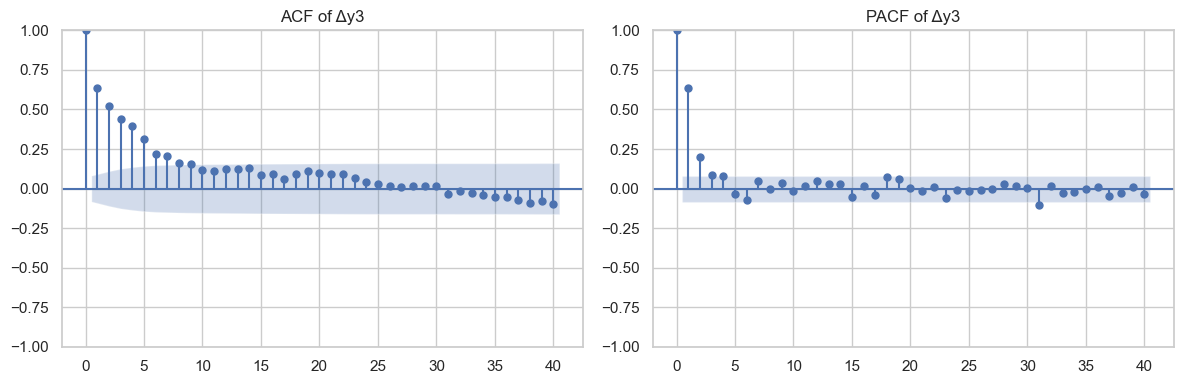

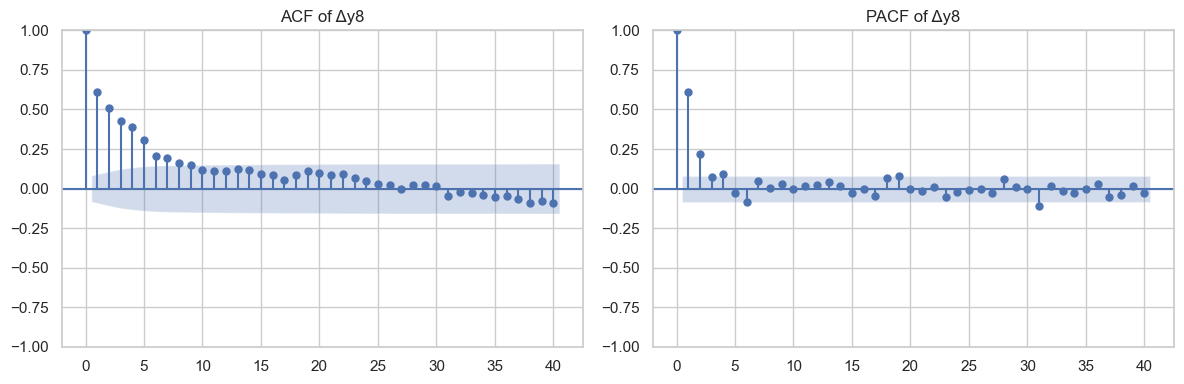

In [ ]:
# First-differenced series
dy3 = df['y3'][:575].diff().dropna()
dy8 = df['y8'][:575].diff().dropna()

# Plot for Δy3
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(dy3, lags=40, ax=axes[0])
plot_pacf(dy3, lags=40, ax=axes[1])
axes[0].set_title("ACF of Δy3")
axes[1].set_title("PACF of Δy3")
plt.tight_layout()
plt.show()

# Plot for Δy8
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(dy8, lags=40, ax=axes[0])
plot_pacf(dy8, lags=40, ax=axes[1])
axes[0].set_title("ACF of Δy8")
axes[1].set_title("PACF of Δy8")
plt.tight_layout()
plt.show()


In [134]:
y3 = df['y3']
y3_in_sample = y3[:575]
y8 = df['y8']
y8_in_sample = y8[:575]


In [ ]:
# Fit ARIMA(2,1,0) on in-sample y3 data (first 575 obs)
model_y3 = ARIMA(y3_in_sample.values, order=(2, 1, 0))
arima210_y3 = model_y3.fit()

# Print summary
print(arima210_y3.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  575
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -799.674
Date:                Fri, 06 Jun 2025   AIC                           1605.348
Time:                        13:26:32   BIC                           1618.406
Sample:                             0   HQIC                          1610.441
                                - 575                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5081      0.043     11.917      0.000       0.424       0.592
ar.L2          0.1989      0.040      4.984      0.000       0.121       0.277
sigma2         0.9488      0.058     16.427      0.0

Both lags are significant at the 5% level.

In [129]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test for autocorrelation in residuals
ljung_test = acorr_ljungbox(arima210_y3.resid, lags=[1, 2, 3, 4, 5], return_df=True)
print(ljung_test)


       lb_stat    lb_pvalue
1 0.0002224618 0.9880998707
2 0.0048552993 0.9975752947
3 0.1527847562 0.9848253088
4 0.2513323603 0.9927353564
5 0.2931859148 0.9977692796


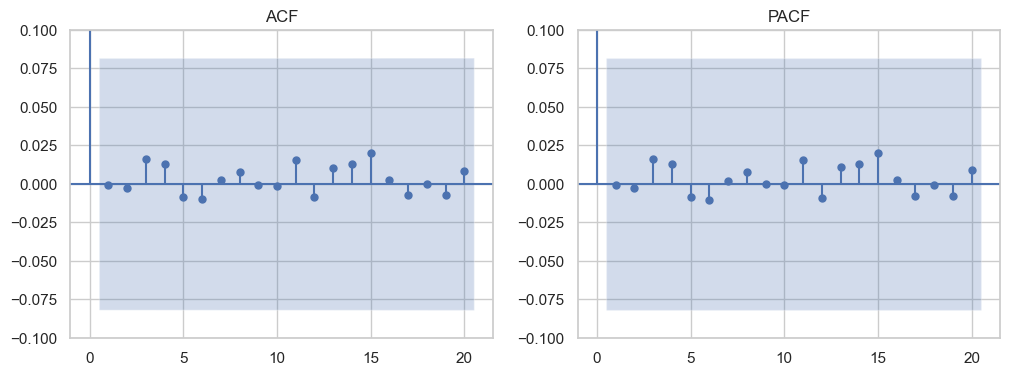

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Autocorrelation plot
plot_acf(arima210_y3.resid, lags=20, ax=axes[0]) # ACF
axes[0].set_title("ACF")
axes[0].set_ylim([-0.1,0.1])

# Partial autocorrelation plot
plot_pacf(arima210_y3.resid, lags=20, ax=axes[1]) # PACF
axes[1].set_title("PACF")
axes[1].set_ylim([-0.1,0.1])

plt.show()

In [135]:
# Fit ARIMA(2,1,0) on in-sample y8 data (first 575 obs)
model_y8 = ARIMA(y8_in_sample.values, order=(2, 1, 0))
arima210_y8 = model_y8.fit()

# Print summary
print(arima210_y8.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  575
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1087.105
Date:                Fri, 06 Jun 2025   AIC                           2180.209
Time:                        13:45:44   BIC                           2193.267
Sample:                             0   HQIC                          2185.302
                                - 575                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4769      0.042     11.370      0.000       0.395       0.559
ar.L2          0.2198      0.039      5.653      0.000       0.144       0.296
sigma2         2.5830      0.160     16.110      0.0

In [136]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test for autocorrelation in residuals
ljung_test = acorr_ljungbox(arima210_y8.resid, lags=[1, 2, 3, 4, 5], return_df=True)
print(ljung_test)


       lb_stat    lb_pvalue
1 0.0111855434 0.9157714021
2 0.0364245866 0.9819525483
3 0.4614461095 0.9272761150
4 0.7694917882 0.9424906866
5 0.8022229058 0.9768913432


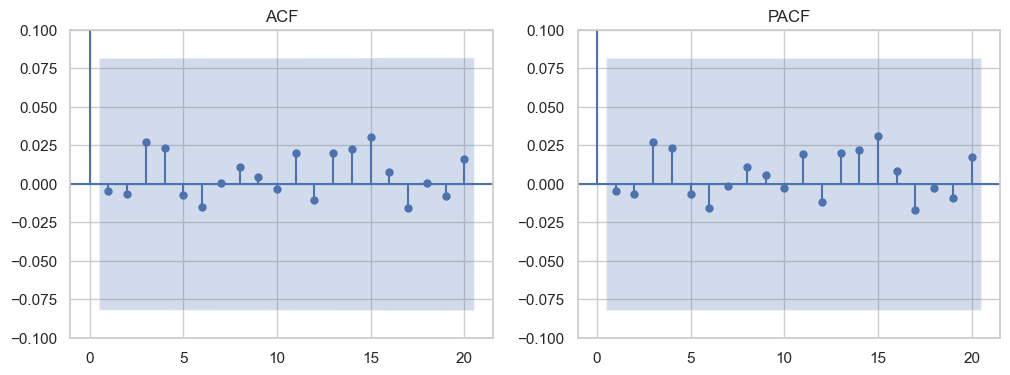

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Autocorrelation plot
plot_acf(arima210_y8.resid, lags=20, ax=axes[0]) # ACF
axes[0].set_title("ACF")
axes[0].set_ylim([-0.1,0.1])

# Partial autocorrelation plot
plot_pacf(arima210_y8.resid, lags=20, ax=axes[1]) # PACF
axes[1].set_title("PACF")
axes[1].set_ylim([-0.1,0.1])

plt.show()